### TESSA NEJLA AYVAZOGLU 
### 14/04/2024 
### Final Project:
### Foundations of Machine Learning Frameworks-CSCN8010
### Objective and Motivation:
### The aim of our project, the Credit Score Classification System, is to create a more advanced and precise model for the classification of individual credit scores. This ### project is inspired by the high importance of credit score classification in the field of finance, where it is the most relevant factor for assessing the client's credibility ### and the possibility to grant loans and credit card access. With that, the motivation behind our project is to improve risk assessments in financial corporations in order to ### avoid loan defaults.
### Problem Statement:
### Given this existing challenge, our project would assist in accurately forecasting a person's credit score category using his or her financial past and behavior. While new ### traditional methods of credit scoring exist, the existing ones are not efficient throughout the credit grading of a person as read from their financial data.
### Data Source Review:
### The project would start with an exploratory data analysis to familiarize with the nature of the datasets before an intensive data cleaning which will involve handling the ###m issing values, duplicate records, and inconsistencies. The dataset will be transformed through feature scaling and encoding the categorical variables to become compatible ### with machine learning algorithms.
### Methodology:
### We intend to implement and evaluate several machine learning models, notably decision trees, random forests, XGBoost, and KNN. Due to the nature of our project's problem, ### oversampling, such as SMOTE, will be used to achieve our model's higher accuracy. The evaluation metrics will include the precision, recall, F1-score, and overall accuracy  ### ascertain that the model is effective in classifying credit scores. As a point of differentiation, we will draw upon the Keras VGG model to examine deep learning as a method ### of enhancing the classifier's functionality.
### Reference Code and Resources:
### We will refer to and modify existing code and methodologies from reputable sources in both the machine learning and finance analytics field at each stage of the project. It ### will assist us in embedding our project within established practices and using new methods.
### Conclusion:
### Our Credit Score Classification System project represents a timely and essential endeavor to improve financial risk assessment. By employing a mix of traditional machine ### learning algorithms and cutting-edge deep learning techniques, we aim to deliver a model that not only advances the field of credit score classification but also provides ### tangible benefits to financial institutions and individuals alike.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, balanced_accuracy_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
import function as f

%matplotlib inline
np.random.seed(42)

# set figure size
plt.rcParams["figure.figsize"] = (15,8)

# set seaborn style
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette='tab10')

### Import data from csv

In [4]:
import pandas as pd

# Read the first 30,000 records of the dataset
df_train = pd.read_csv("train.csv", nrows=30000)
df_test = pd.read_csv("test.csv")
 

# Display the first few rows to confirm
print(df_train.head())

       ID Customer_ID     Month           Name   Age          SSN Occupation   
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist  \
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix   
0      19114.12            1824.843333                  3  ...           _  \
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

### Data Information

In [5]:
df_test


ID Customer_ID      Month             Name   Age          SSN   
0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265  \
1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
3       0x160d   CUS_0xd40   December    Aaron Maashoh   24_  821-00-0265   
4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839   
...        ...         ...        ...              ...   ...          ...   
49995  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942   
49996  0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   
49997  0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   
49998  0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   
49999  0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...   
0      Scientist      19114.12            1824.843333                  3  ...  \
1      Scientist      19114.12            1824.843333                  3  ...   
2      Scientist      19114.12            1824.843333                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4        _______      34847.84            3037.986667                  2  ...   
...          ...           ...                    ...                ...  ...   
49995  Architect      20002.88            1929.906667                 10  ...   
49996   Mechanic      39628.99                    NaN                  4  ...   
49997   Mechanic      39628.99            3359.415833                  4  ...   
49998   Mechanic      39628.99                    NaN                  4  ...   
49999   Mechanic      39628.99            3359.415833                  4  ...   

       Num_Credit_Inquiries  Credit_Mix Outstanding_Debt   
0                    2022.0        Good           809.98  \
1                       4.0        Good           809.98   
2                       4.0        Good           809.98   
3                       4.0        Good           809.98   
4                       5.0        Good           605.03   
...                     ...         ...              ...   
49995                  12.0           _           3571.7   
49996                   7.0        Good           502.38   
49997                   7.0        Good           502.38   
49998                   7.0        Good           502.38   
49999                   7.0           _           502.38   

      Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount   
0                    35.030402   22 Years and 9 Months                    No  \
1                    33.053114  22 Years and 10 Months                    No   
2                    33.811894                     NaN                    No   
3                    32.430559   23 Years and 0 Months                    No   
4                    25.926822   27 Years and 3 Months                    No   
...                        ...                     ...                   ...   
49995                34.780553                     NaN                   Yes   
49996                27.758522  31 Years and 11 Months                    NM   
49997                36.858542   32 Years and 0 Months                    No   
49998                39.139840   32 Years and 1 Months                    No   
49999                34.108530   32 Years and 2 Months                    No   

      Total_EMI_per_month  Amount_invested_monthly   
0               49.574949       236.64268203272135  \
1               49.574949       21.465380264657146   
2               49.574949       148.23393788500925   
3               49.574949        39.08251089460281   
4               18.816215       39.684018417945296   
...                   ...                      ...   
49995           60.964772       146.48632477751087   


In [6]:
df_train

ID Customer_ID     Month           Name   Age          SSN   
0      0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  \
1      0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2      0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3      0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4      0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...       ...         ...       ...            ...   ...          ...   
29995  0xc5c1  CUS_0x5ee7     April            NaN    55    #F%$D@*&8   
29996  0xc5c2  CUS_0x5ee7       May        Halpinx    55  674-29-2346   
29997  0xc5c3  CUS_0x5ee7      June            NaN    55  674-29-2346   
29998  0xc5c4  CUS_0x5ee7      July        Halpinx    55  674-29-2346   
29999  0xc5c5  CUS_0x5ee7    August            NaN    55  674-29-2346   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...   
0      Scientist      19114.12            1824.843333                  3  ...  \
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
29995  Developer      92127.24            7849.270000                  5  ...   
29996  Developer      92127.24            7849.270000                  5  ...   
29997  Developer      92127.24            7849.270000                  5  ...   
29998  Developer      92127.24            7849.270000                  5  ...   
29999  Developer      92127.24            7849.270000                  5  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio   
0               _            809.98                26.822620  \
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
29995        Good            487.54                38.876878   
29996        Good            487.54                33.743466   
29997           _            487.54                33.359951   
29998           _            487.54                31.643809   
29999        Good            487.54                34.563176   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month   
0       22 Years and 1 Months                     No           49.574949  \
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
29995  20 Years and 11 Months                     No          175.915944   
29996                     NaN                     No          175.915944   
29997   21 Years and 1 Months                     No          175.915944   
29998                     NaN                     No         7322.000000   
29999   21 Years and 3 Months                     No          175.915944   

      Amount_invested_monthly                 Payment_Behaviour   
0           80.41529543900253   High_spent_Small_value_payments  \
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                               ...   
29995     

### Descriptive Statistics for DataFrame Columns

In [7]:
#Show information
df = df_train
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())  
desc_df

feature data_type  null_num   null_pct  unique_num   
0                         ID    object         0   0.000000       30000  \
1                Customer_ID    object         0   0.000000        3750   
2                      Month    object         0   0.000000           8   
3                       Name    object      3012  10.040000        3508   
4                        Age    object         0   0.000000         627   
5                        SSN    object         0   0.000000        3751   
6                 Occupation    object         0   0.000000          16   
7              Annual_Income    object         0   0.000000        5656   
8      Monthly_Inhand_Salary   float64      4485  14.950000        3966   
9          Num_Bank_Accounts     int64         0   0.000000         335   
10           Num_Credit_Card     int64         0   0.000000         579   
11             Interest_Rate     int64         0   0.000000         588   
12               Num_of_Loan    object         0   0.000000         143   
13              Type_of_Loan    object      3424  11.413333        2191   
14       Delay_from_due_date     int64         0   0.000000          73   
15    Num_of_Delayed_Payment    object      2131   7.103333         266   
16      Changed_Credit_Limit    object         0   0.000000        3266   
17      Num_Credit_Inquiries   float64       585   1.950000         457   
18                Credit_Mix    object         0   0.000000           4   
19          Outstanding_Debt    object         0   0.000000        4026   
20  Credit_Utilization_Ratio   float64         0   0.000000       30000   
21        Credit_History_Age    object      2770   9.233333         404   
22     Payment_of_Min_Amount    object         0   0.000000           3   
23       Total_EMI_per_month   float64         0   0.000000        4502   
24   Amount_invested_monthly    object      1334   4.446667       27359   
25         Payment_Behaviour    object         0   0.000000           7   
26           Monthly_Balance    object       396   1.320000       29602   
27              Credit_Score    object         0   0.000000           3   

                                        unique_sample  
0                    [0x1602, 0x1603, 0x1604, 0x1605]  
1     [CUS_0xd40, CUS_0x21b1, CUS_0x2dbc, CUS_0xb891]  
2                   [January, February, March, April]  
3       [Aaron Maashoh, nan, Rick Rothackerj, Langep]  
4                                 [23, -500, 28_, 28]  
5   [821-00-0265, #F%$D@*&8, 004-07-5839, 486-85-3...  
6             [Scientist, _______, Teacher, Engineer]  
7          [19114.12, 34847.84, 34847.84_, 143162.64]  
8   [1824.8433333333328, nan, 3037.986666666666, 1...  
9                                        [3, 2, 1, 7]  
10                                 [4, 1385, 5, 1288]  
11                                       [3, 6, 8, 4]  
12                                     [4, 1, 3, 967]  
13  [Auto Loan, Credit-Builder Loan, Personal Loan...  
14                                      [3, -1, 5, 6]  
15                                    [7, nan, 4, 8_]  
16                             [11.27, _, 6.27, 9.27]  
17                               [4.0, 2.0, 3.0, nan]  
18                           [_, Good, Standard, Bad]  
19                  [809.98, 605.03, 1303.01, 632.46]  
20  [26.822619623699016, 31.94496005538421, 28.609...  
21  [22 Years and 1 Months, nan, 22 Years and 3 Mo...  
22                                      [No, NM, Yes]  
23  [49.57494921489417, 18.816214573128885, 246.99...  
24  [80.41529543900253, 118.28022162236736, 81.699...  
25  [High_spent_Small_value_payments, Low_spent_La...  
26  [312.49408867943663, 284.62916249607184, 331.2...  
27                             [Good, Standard, Poor]

### Defining Features (X) and Target (Y) Variables

In [8]:
#Define X and Y from df_train
x = df_train.drop('Credit_Score', axis=1)
y = df_train['Credit_Score']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: Credit_Score
Non-Null Count  Dtype 
--------------  ----- 
30000 non-null  object
dtypes: object(1)
memory usage: 234.5+ KB


### 

### Data exploratory

In [11]:
# df_cleaned.shape
# # copy dataset
# eda = df_cleaned.copy()
# # define numeric and category features
# num = eda.select_dtypes(include='number').columns
# cat = eda.select_dtypes(include='object').columns

# len(num), len(cat)
eda = x
num = eda.select_dtypes(include=['number', 'object']).columns
numeric_data = eda[num]


In [12]:
#Deescriptive Statistic
eda[num].describe().T


count         mean          std         min   
Monthly_Inhand_Salary     25515.0  4260.299707  3204.743686  333.596667  \
Num_Bank_Accounts         30000.0    16.510167   114.517321    0.000000   
Num_Credit_Card           30000.0    23.533433   132.996975    0.000000   
Interest_Rate             30000.0    67.631667   444.386331    1.000000   
Delay_from_due_date       30000.0    20.967400    14.624826   -5.000000   
Num_Credit_Inquiries      29415.0    26.385654   184.335918    0.000000   
Credit_Utilization_Ratio  30000.0    32.311826     5.142857   20.000000   
Total_EMI_per_month       30000.0  1424.558402  8410.309536    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1656.841250  3141.445833  6078.743333  14866.446667  
Num_Bank_Accounts            3.000000     6.000000     8.000000   1798.000000  
Num_Credit_Card              4.000000     6.000000     7.000000   1499.000000  
Interest_Rate                7.000000    13.000000    20.000000   5788.000000  
Delay_from_due_date         10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries         3.000000     5.000000     9.000000   2594.000000  
Credit_Utilization_Ratio    28.032476    32.340023    36.564773     50.000000  
Total_EMI_per_month         30.305498    68.785100   165.111416  82256.000000

In [13]:
# eda[cat].describe().T

In [14]:
num_rows, num_columns = eda.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 30000
Number of columns: 27


In [15]:
eda[num]

ID Customer_ID     Month           Name   Age          SSN   
0      0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  \
1      0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2      0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3      0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4      0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...       ...         ...       ...            ...   ...          ...   
29995  0xc5c1  CUS_0x5ee7     April            NaN    55    #F%$D@*&8   
29996  0xc5c2  CUS_0x5ee7       May        Halpinx    55  674-29-2346   
29997  0xc5c3  CUS_0x5ee7      June            NaN    55  674-29-2346   
29998  0xc5c4  CUS_0x5ee7      July        Halpinx    55  674-29-2346   
29999  0xc5c5  CUS_0x5ee7    August            NaN    55  674-29-2346   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...   
0      Scientist      19114.12            1824.843333                  3  ...  \
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
29995  Developer      92127.24            7849.270000                  5  ...   
29996  Developer      92127.24            7849.270000                  5  ...   
29997  Developer      92127.24            7849.270000                  5  ...   
29998  Developer      92127.24            7849.270000                  5  ...   
29999  Developer      92127.24            7849.270000                  5  ...   

       Num_Credit_Inquiries  Credit_Mix Outstanding_Debt   
0                       4.0           _           809.98  \
1                       4.0        Good           809.98   
2                       4.0        Good           809.98   
3                       4.0        Good           809.98   
4                       4.0        Good           809.98   
...                     ...         ...              ...   
29995                   1.0        Good           487.54   
29996                   2.0        Good           487.54   
29997                   2.0           _           487.54   
29998                   2.0           _           487.54   
29999                   2.0        Good           487.54   

      Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount   
0                    26.822620   22 Years and 1 Months                    No  \
1                    31.944960                     NaN                    No   
2                    28.609352   22 Years and 3 Months                    No   
3                    31.377862   22 Years and 4 Months                    No   
4                    24.797347   22 Years and 5 Months                    No   
...                        ...                     ...                   ...   
29995                38.876878  20 Years and 11 Months                    No   
29996                33.743466                     NaN                    No   
29997                33.359951   21 Years and 1 Months                    No   
29998                31.643809                     NaN                    No   
29999                34.563176   21 Years and 3 Months                    No   

      Total_EMI_per_month  Amount_invested_monthly   
0               49.574949        80.41529543900253  \
1               49.574949       118.28022162236736   
2               49.574949          81.699521264648   
3               49.574949        199.4580743910713   
4               49.574949       41.420153086217326   
...                   ...                      ...   
29995          175.915944       291.50094465170713   
29996          175.915944       130.69831234151

In [16]:
# Create a copy of the original DataFrame
eda_1 = eda.copy()

# Convert object-type columns to numeric if possible
eda_1[num] = eda[num].apply(pd.to_numeric, errors='coerce')

In [17]:
eda_1[num] = eda[num].apply(pd.to_numeric, errors='coerce')

In [18]:
eda[num]

ID Customer_ID     Month           Name   Age          SSN   
0      0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  \
1      0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2      0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3      0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4      0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...       ...         ...       ...            ...   ...          ...   
29995  0xc5c1  CUS_0x5ee7     April            NaN    55    #F%$D@*&8   
29996  0xc5c2  CUS_0x5ee7       May        Halpinx    55  674-29-2346   
29997  0xc5c3  CUS_0x5ee7      June            NaN    55  674-29-2346   
29998  0xc5c4  CUS_0x5ee7      July        Halpinx    55  674-29-2346   
29999  0xc5c5  CUS_0x5ee7    August            NaN    55  674-29-2346   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...   
0      Scientist      19114.12            1824.843333                  3  ...  \
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
29995  Developer      92127.24            7849.270000                  5  ...   
29996  Developer      92127.24            7849.270000                  5  ...   
29997  Developer      92127.24            7849.270000                  5  ...   
29998  Developer      92127.24            7849.270000                  5  ...   
29999  Developer      92127.24            7849.270000                  5  ...   

       Num_Credit_Inquiries  Credit_Mix Outstanding_Debt   
0                       4.0           _           809.98  \
1                       4.0        Good           809.98   
2                       4.0        Good           809.98   
3                       4.0        Good           809.98   
4                       4.0        Good           809.98   
...                     ...         ...              ...   
29995                   1.0        Good           487.54   
29996                   2.0        Good           487.54   
29997                   2.0           _           487.54   
29998                   2.0           _           487.54   
29999                   2.0        Good           487.54   

      Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount   
0                    26.822620   22 Years and 1 Months                    No  \
1                    31.944960                     NaN                    No   
2                    28.609352   22 Years and 3 Months                    No   
3                    31.377862   22 Years and 4 Months                    No   
4                    24.797347   22 Years and 5 Months                    No   
...                        ...                     ...                   ...   
29995                38.876878  20 Years and 11 Months                    No   
29996                33.743466                     NaN                    No   
29997                33.359951   21 Years and 1 Months                    No   
29998                31.643809                     NaN                    No   
29999                34.563176   21 Years and 3 Months                    No   

      Total_EMI_per_month  Amount_invested_monthly   
0               49.574949        80.41529543900253  \
1               49.574949       118.28022162236736   
2               49.574949          81.699521264648   
3               49.574949        199.4580743910713   
4               49.574949       41.420153086217326   
...                   ...                      ...   
29995          175.915944       291.50094465170713   
29996          175.915944       130.69831234151

### Analysis for numeric features

In [21]:
# Sample a subset of the data
sample_eda = eda.sample(n=10000, random_state=1)

# Identify numeric and categorical columns
num = sample_eda.select_dtypes(include=[np.number]).columns
cat = sample_eda.select_dtypes(include=['object', 'category']).columns

combined_columns = num.tolist() + cat.tolist()


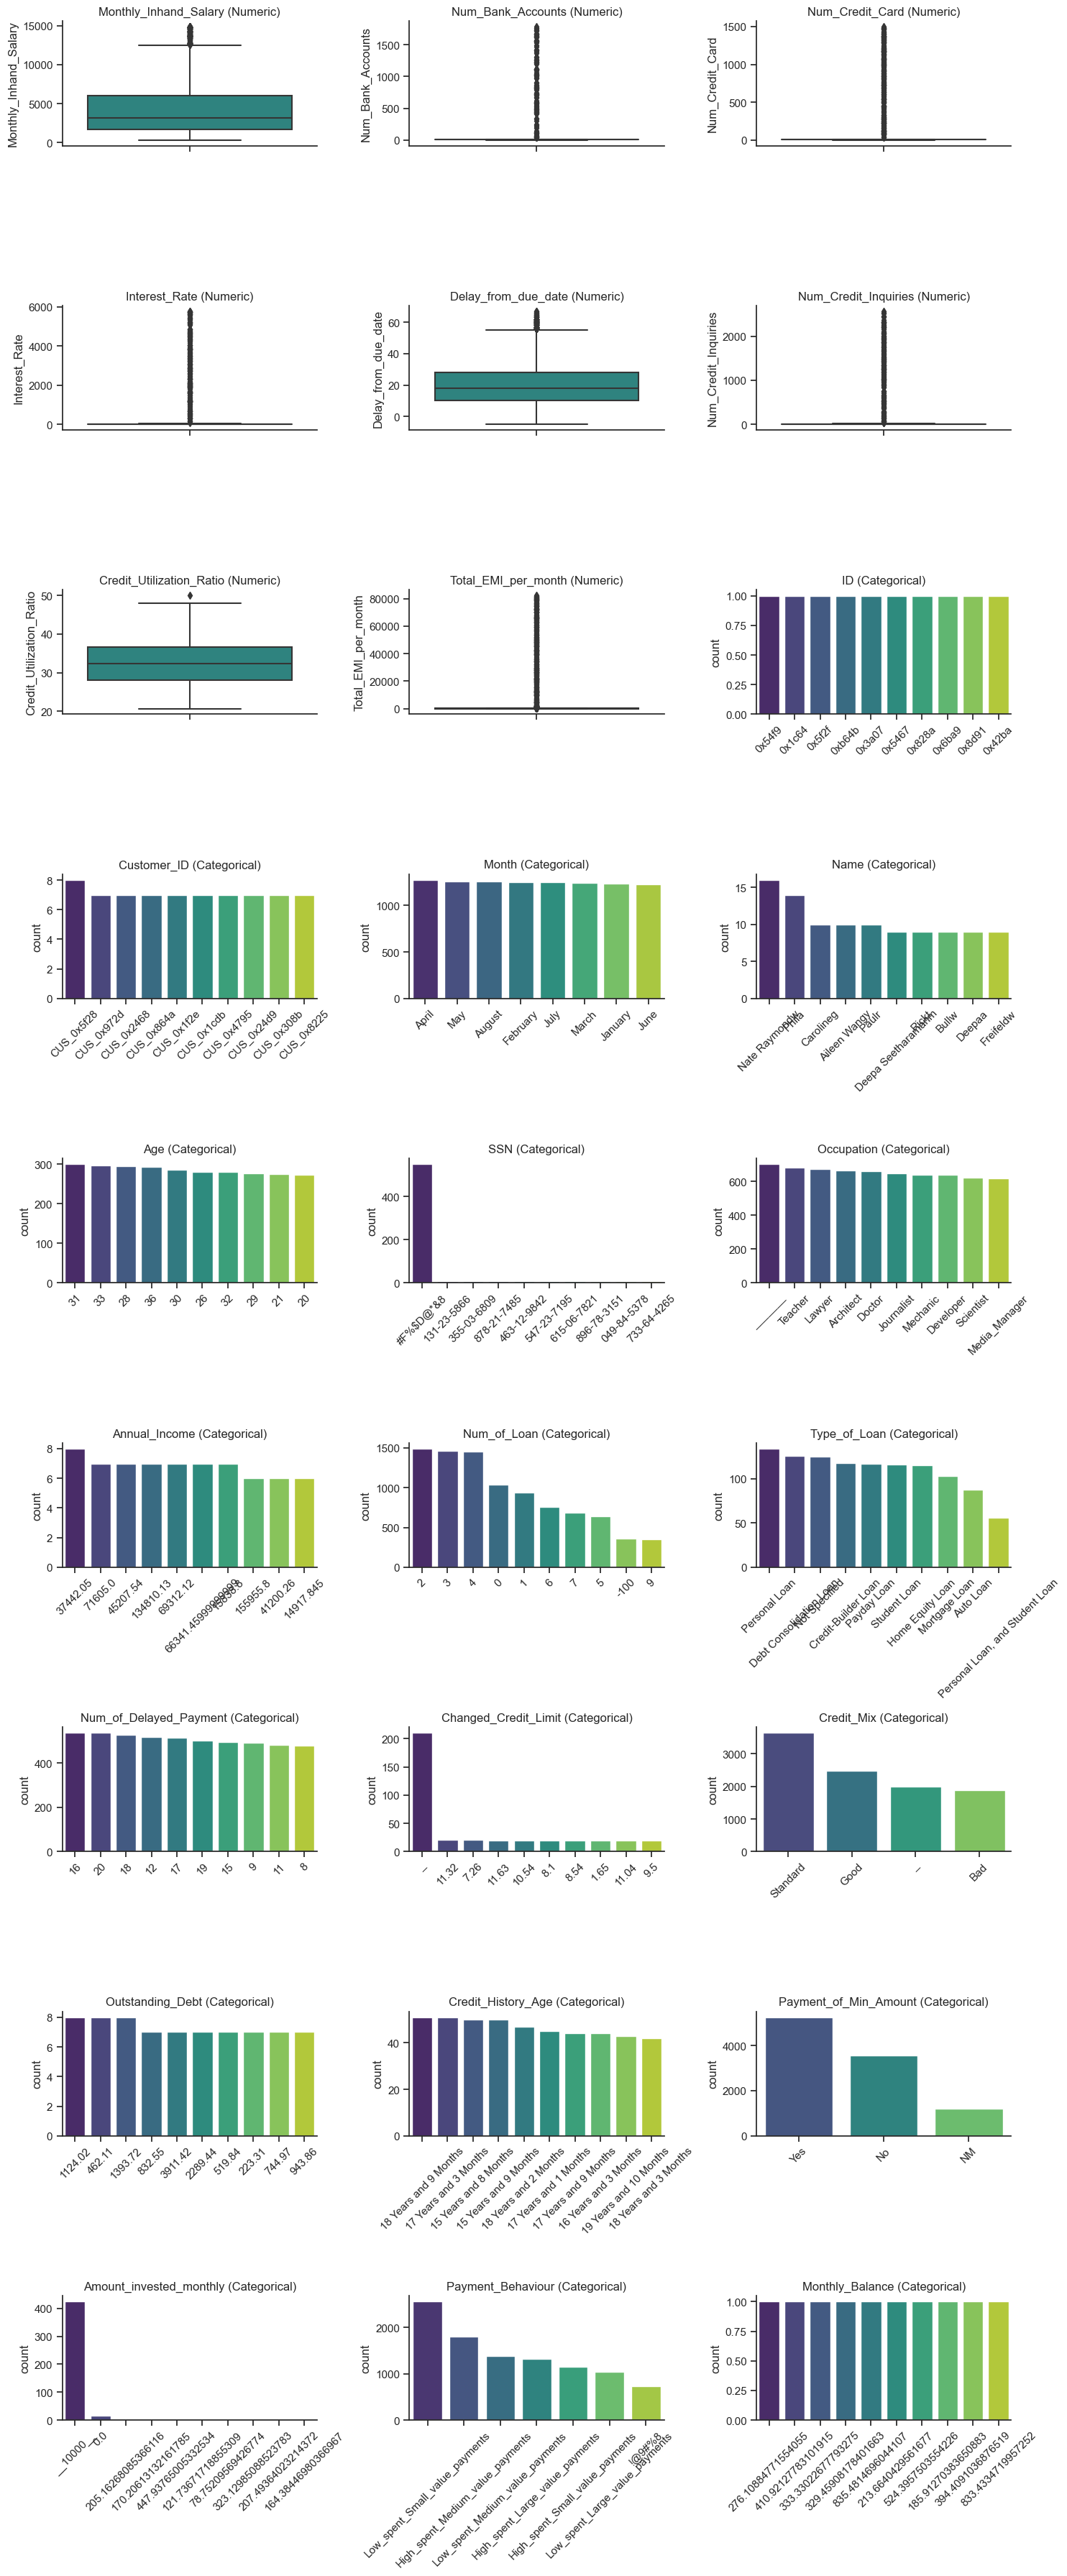

In [22]:
# Sample a subset of the data
sample_eda = eda.sample(n=10000, random_state=1)

# Identify numeric and categorical columns
num = sample_eda.select_dtypes(include=[np.number]).columns
cat = sample_eda.select_dtypes(include=['object', 'category']).columns

# Combine column lists
combined_columns = num.tolist() + cat.tolist()

# Setup the figure for plotting
num_features = len(combined_columns)
num_rows = (num_features + 2) // 3
num_columns = min(3, num_features)
plt.figure(figsize=(15, 4 * num_rows))

# Plot each feature
for i, col in enumerate(combined_columns):
    plt.subplot(num_rows, num_columns, i + 1)
    if col in num:
        sns.boxplot(y=sample_eda[col], palette='viridis')
    else:
        top_categories = sample_eda[col].value_counts().nlargest(10).index
        sns.countplot(x=sample_eda[col], palette='viridis', order=top_categories)
    plt.title(f'{col} ({ "Numeric" if col in num else "Categorical"})', fontsize=12)
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

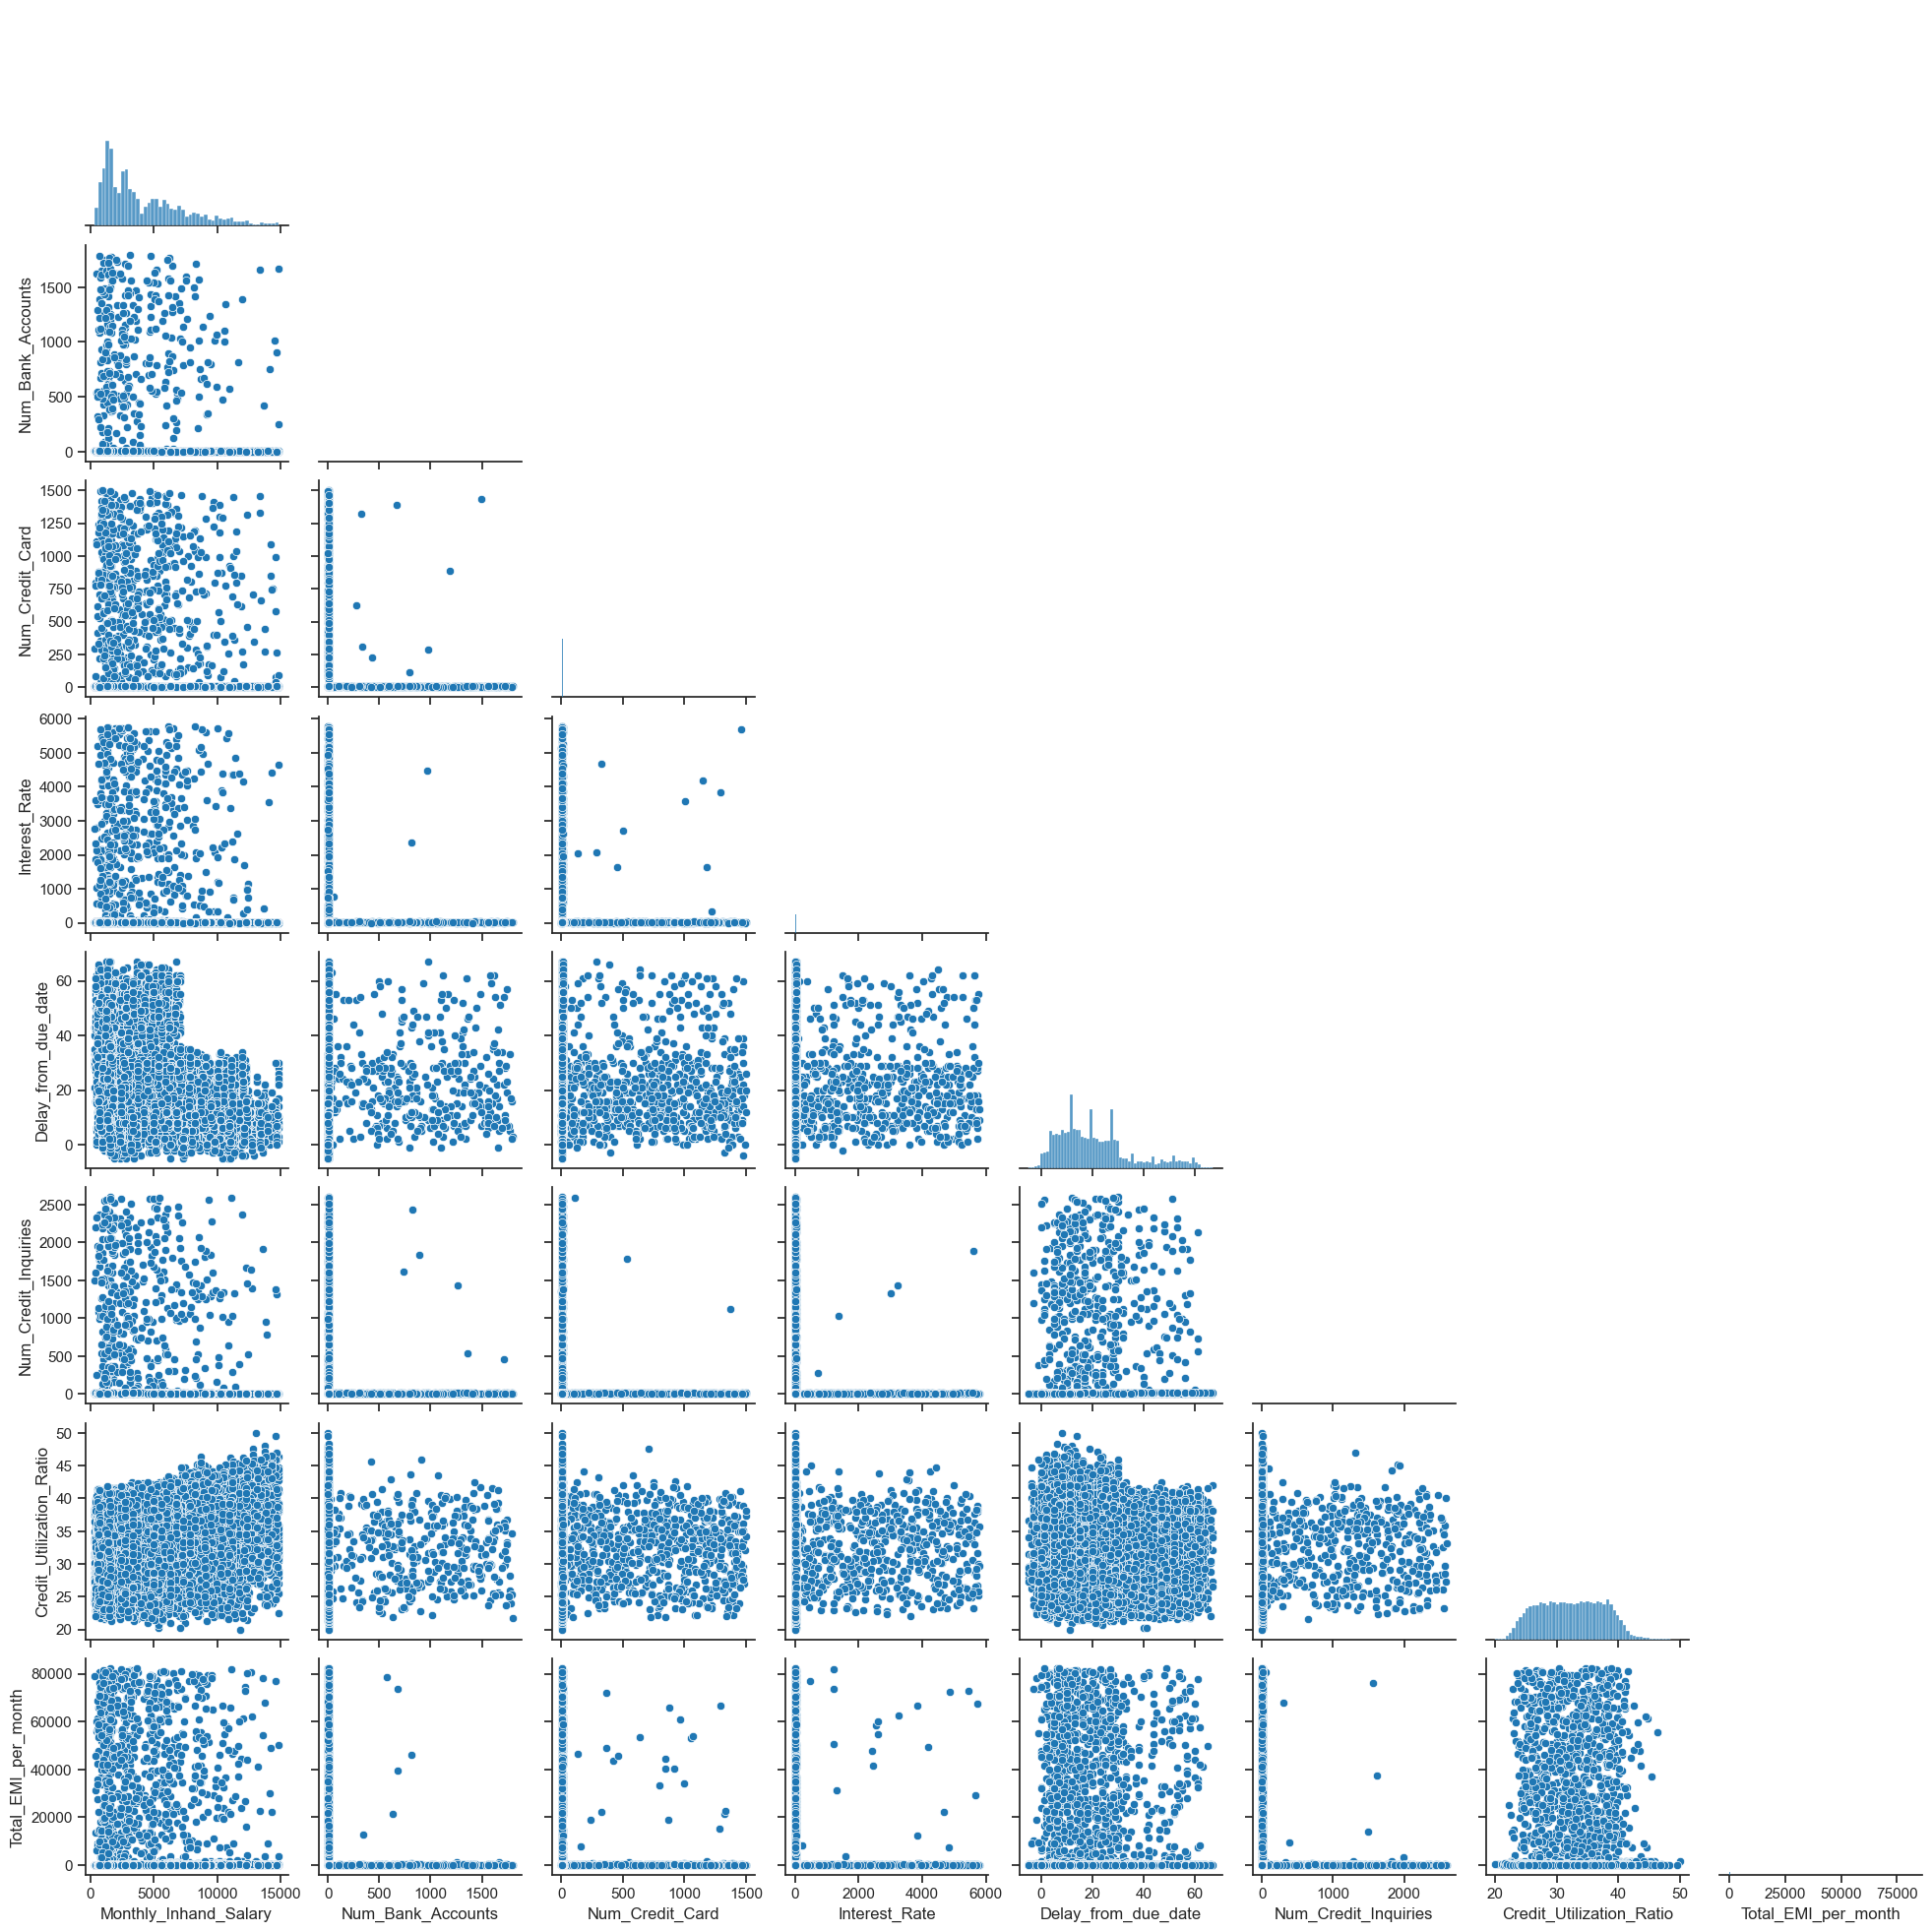

In [23]:
 # Assuming 'eda' is your DataFrame and 'num' is the list of numeric column names
# Filter the DataFrame to only include numeric columns
numeric_data = eda[num]

# Create a pairplot of the numeric data
sns.pairplot(numeric_data, corner=True)

# Show the plot
plt.show()

# # This will extract all columns in 'eda' that have a numeric data type
# num = eda.select_dtypes(include=[np.number]).columns

# # Then use the above code to create the pairplot
# numeric_data = eda[num]
# sns.pairplot(numeric_data, corner=True)
# plt.show()

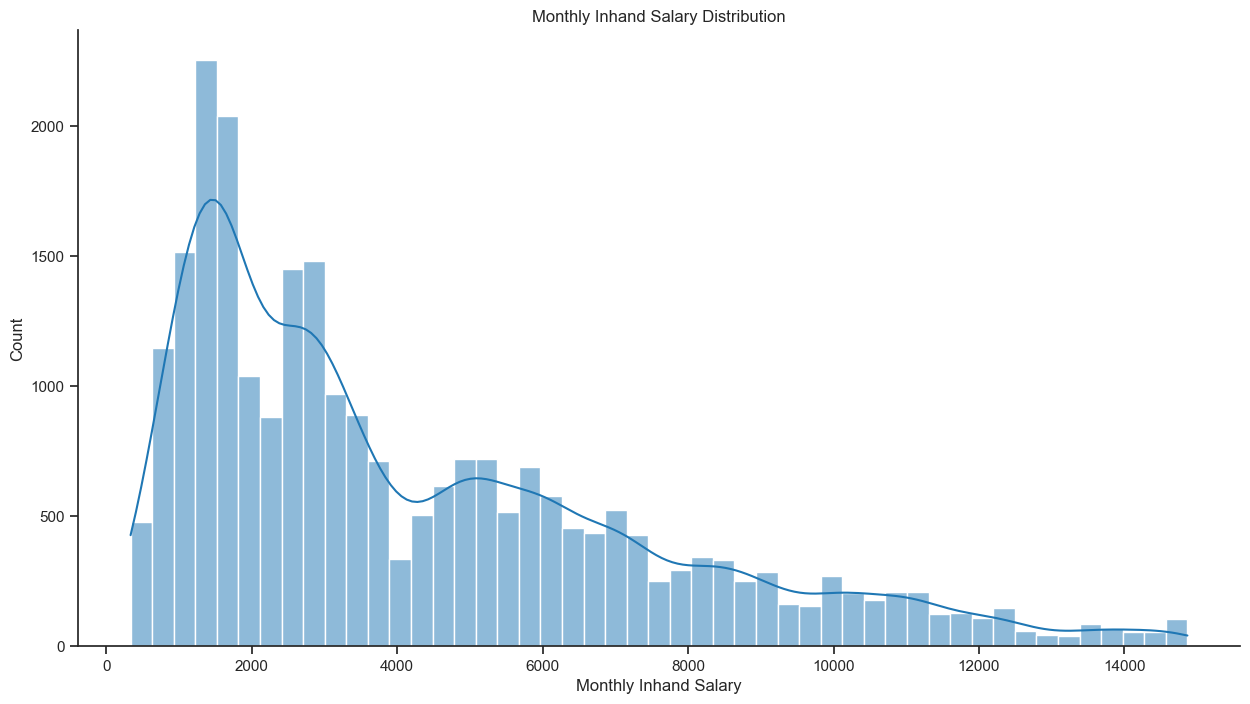

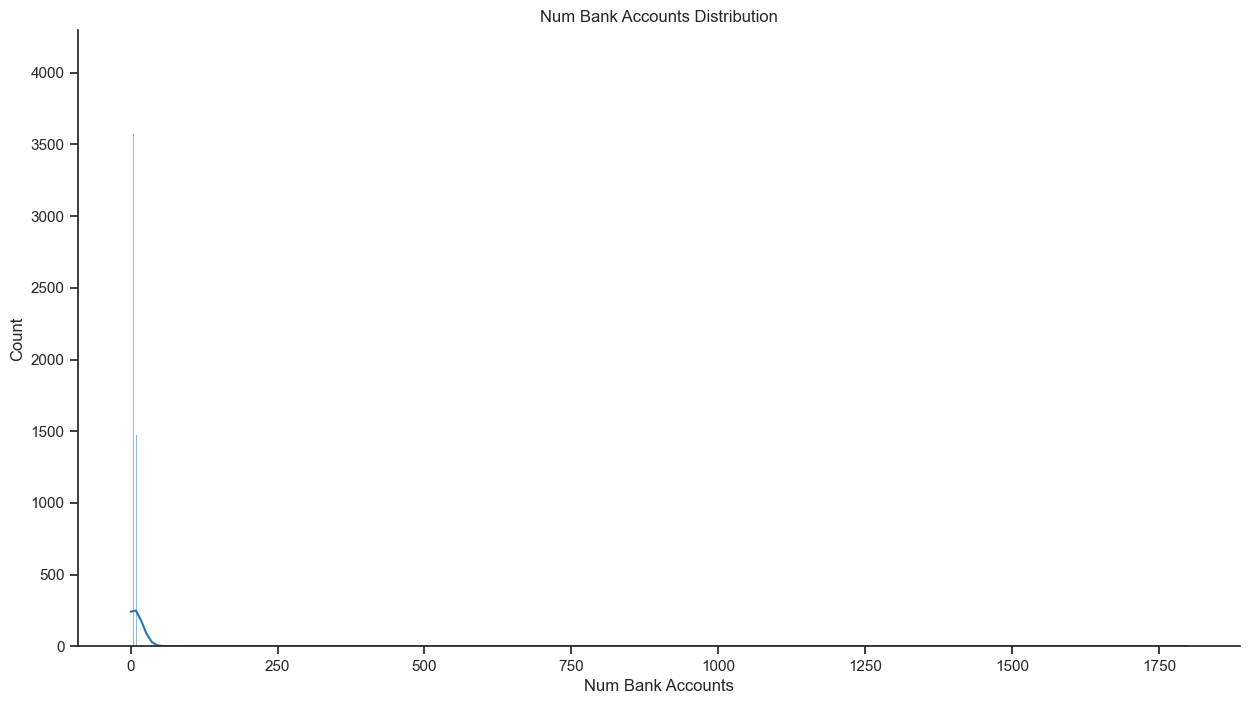

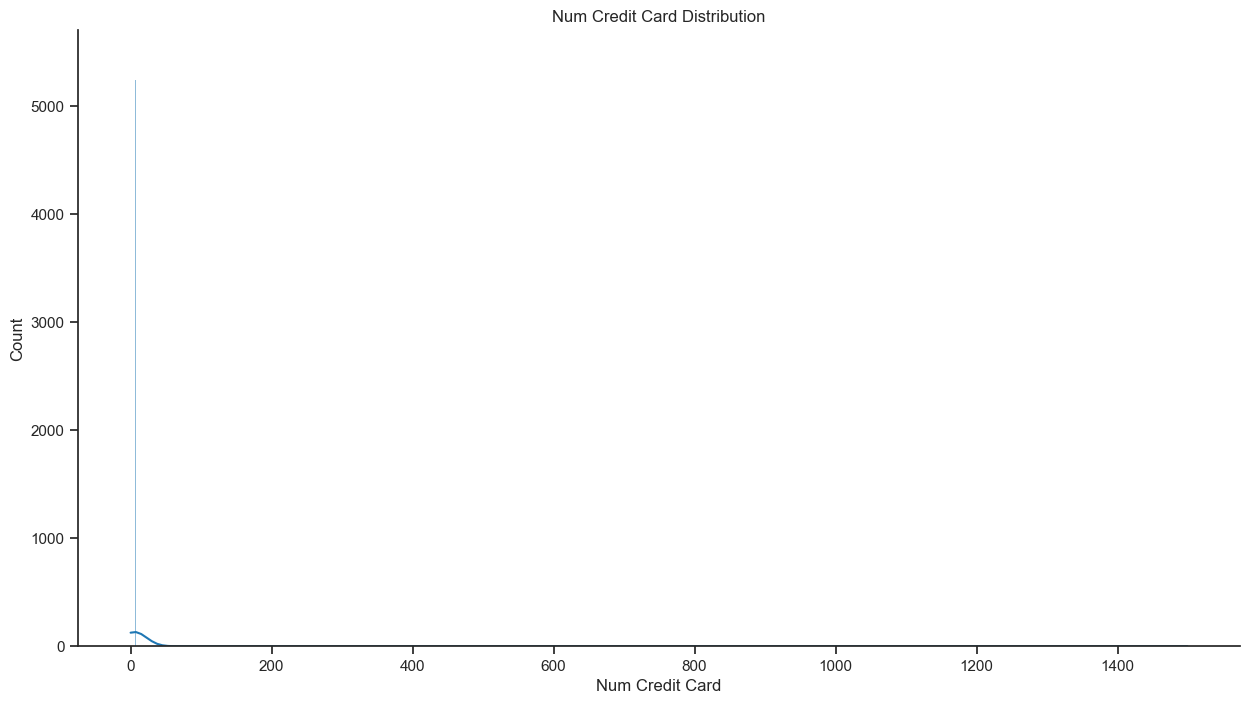

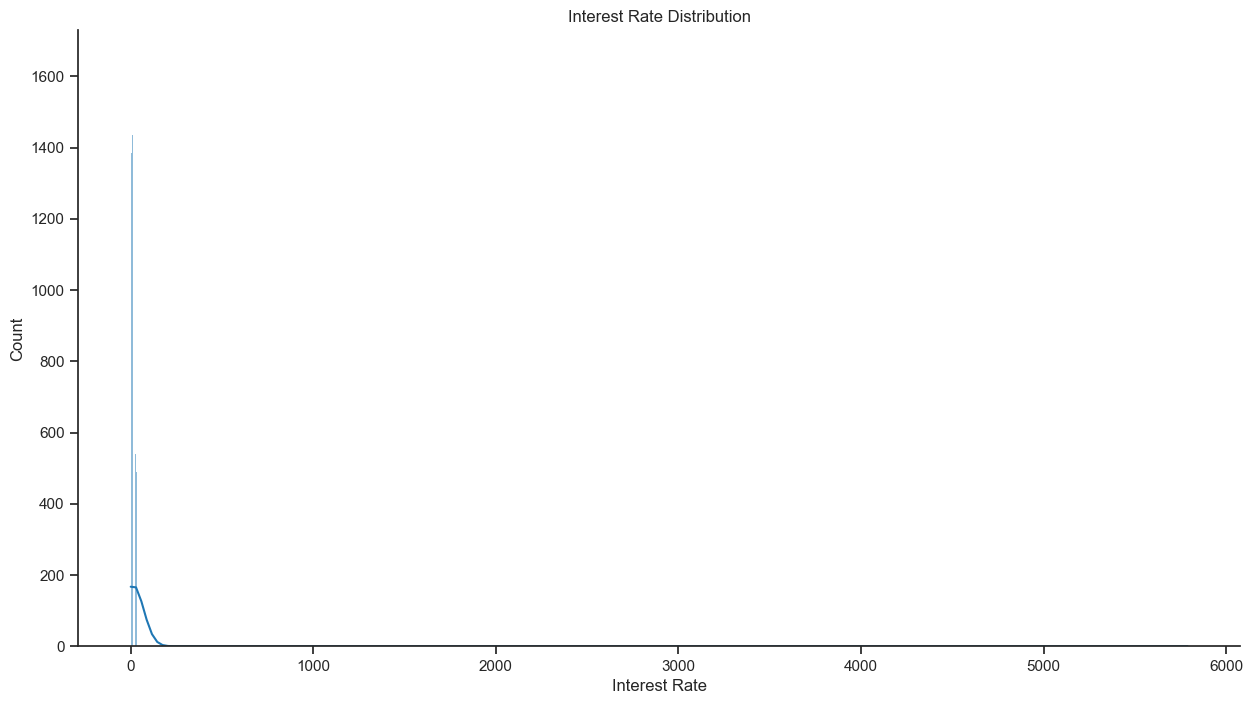

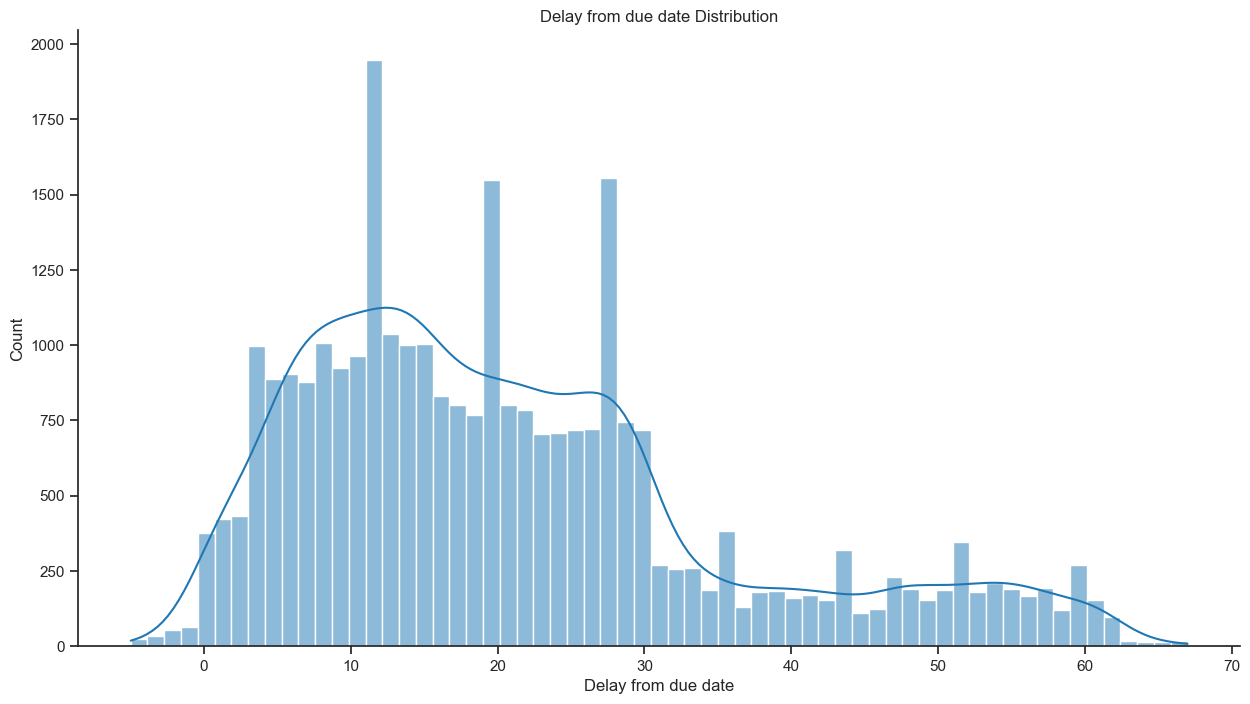

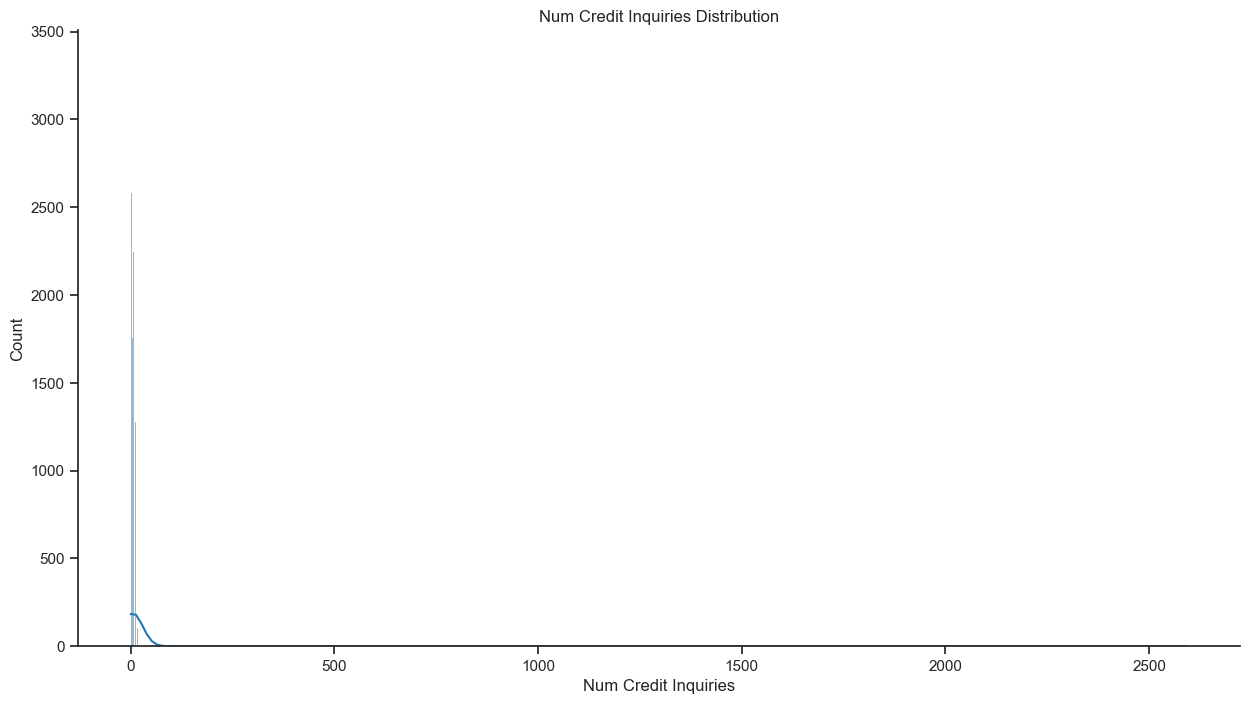

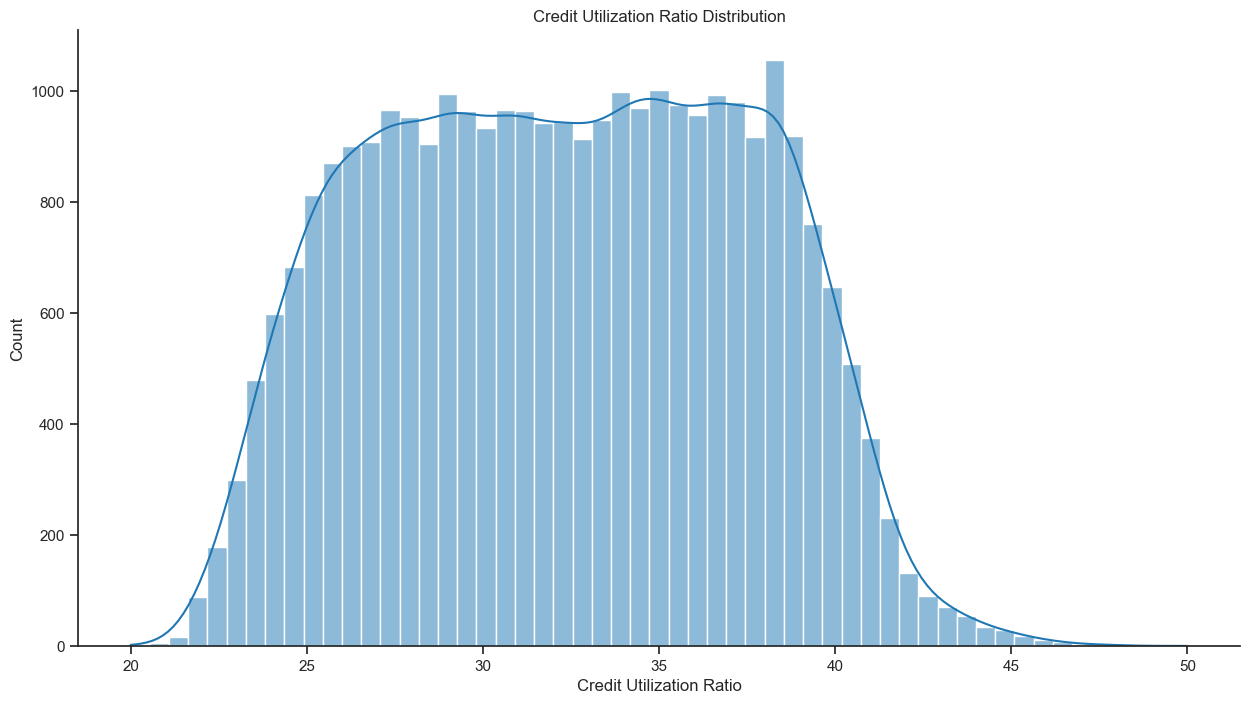

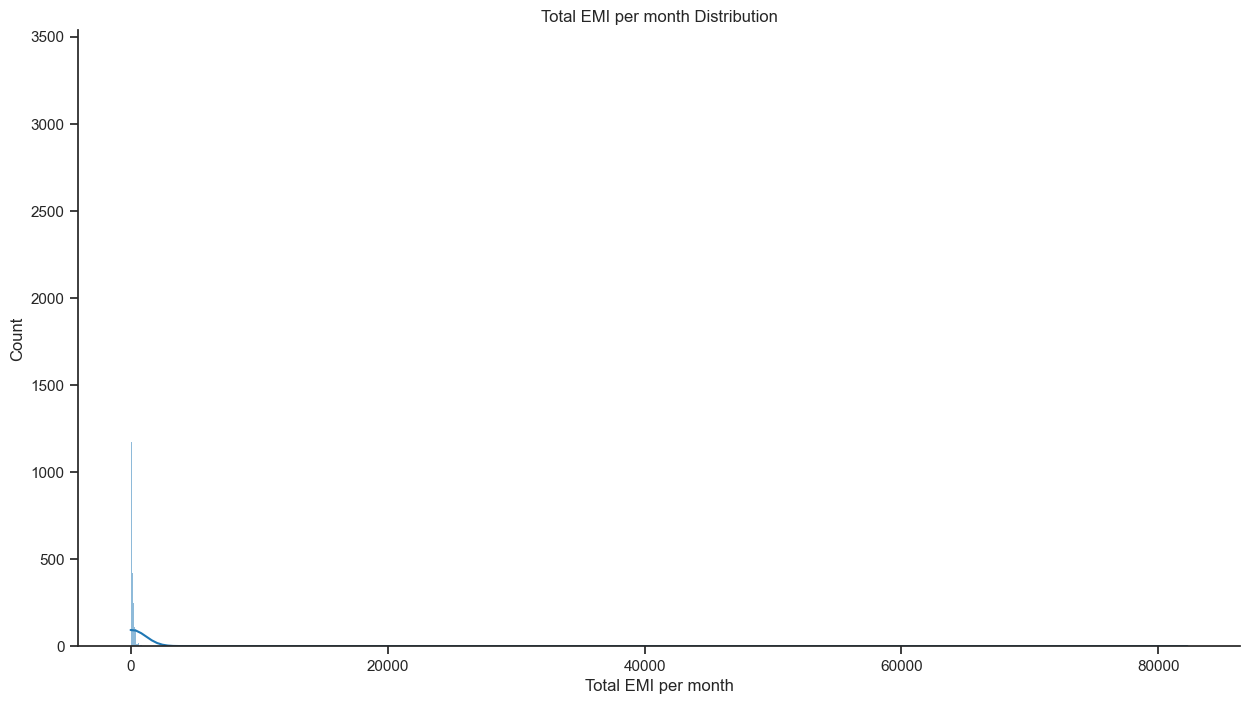

In [24]:
ax1 = f.plotHistogram(data=numeric_data, x='Monthly_Inhand_Salary', xlabel='Monthly Inhand Salary', ylabel='Count', title='Monthly Inhand Salary Distribution')
ax2 = f.plotHistogram(data=numeric_data, x='Num_Bank_Accounts', xlabel='Num Bank Accounts', ylabel='Count', title='Num Bank Accounts Distribution')
ax3 = f.plotHistogram(data=numeric_data, x='Num_Credit_Card', xlabel='Num Credit Card', ylabel='Count', title='Num Credit Card Distribution')
ax4 = f.plotHistogram(data=numeric_data, x='Interest_Rate', xlabel='Interest Rate', ylabel='Count', title='Interest Rate Distribution')
ax5 = f.plotHistogram(data=numeric_data, x='Delay_from_due_date', xlabel='Delay from due date', ylabel='Count', title='Delay from due date Distribution')
ax6 = f.plotHistogram(data=numeric_data, x='Num_Credit_Inquiries', xlabel='Num Credit Inquiries', ylabel='Count', title='Num Credit Inquiries Distribution')
ax7 = f.plotHistogram(data=numeric_data, x='Credit_Utilization_Ratio', xlabel='Credit Utilization Ratio', ylabel='Count', title='Credit Utilization Ratio Distribution')
ax8 = f.plotHistogram(data=numeric_data, x='Total_EMI_per_month', xlabel='Total EMI per month', ylabel='Count', title='Total EMI per month Distribution')

plt.show()


### Bivariate Analysis

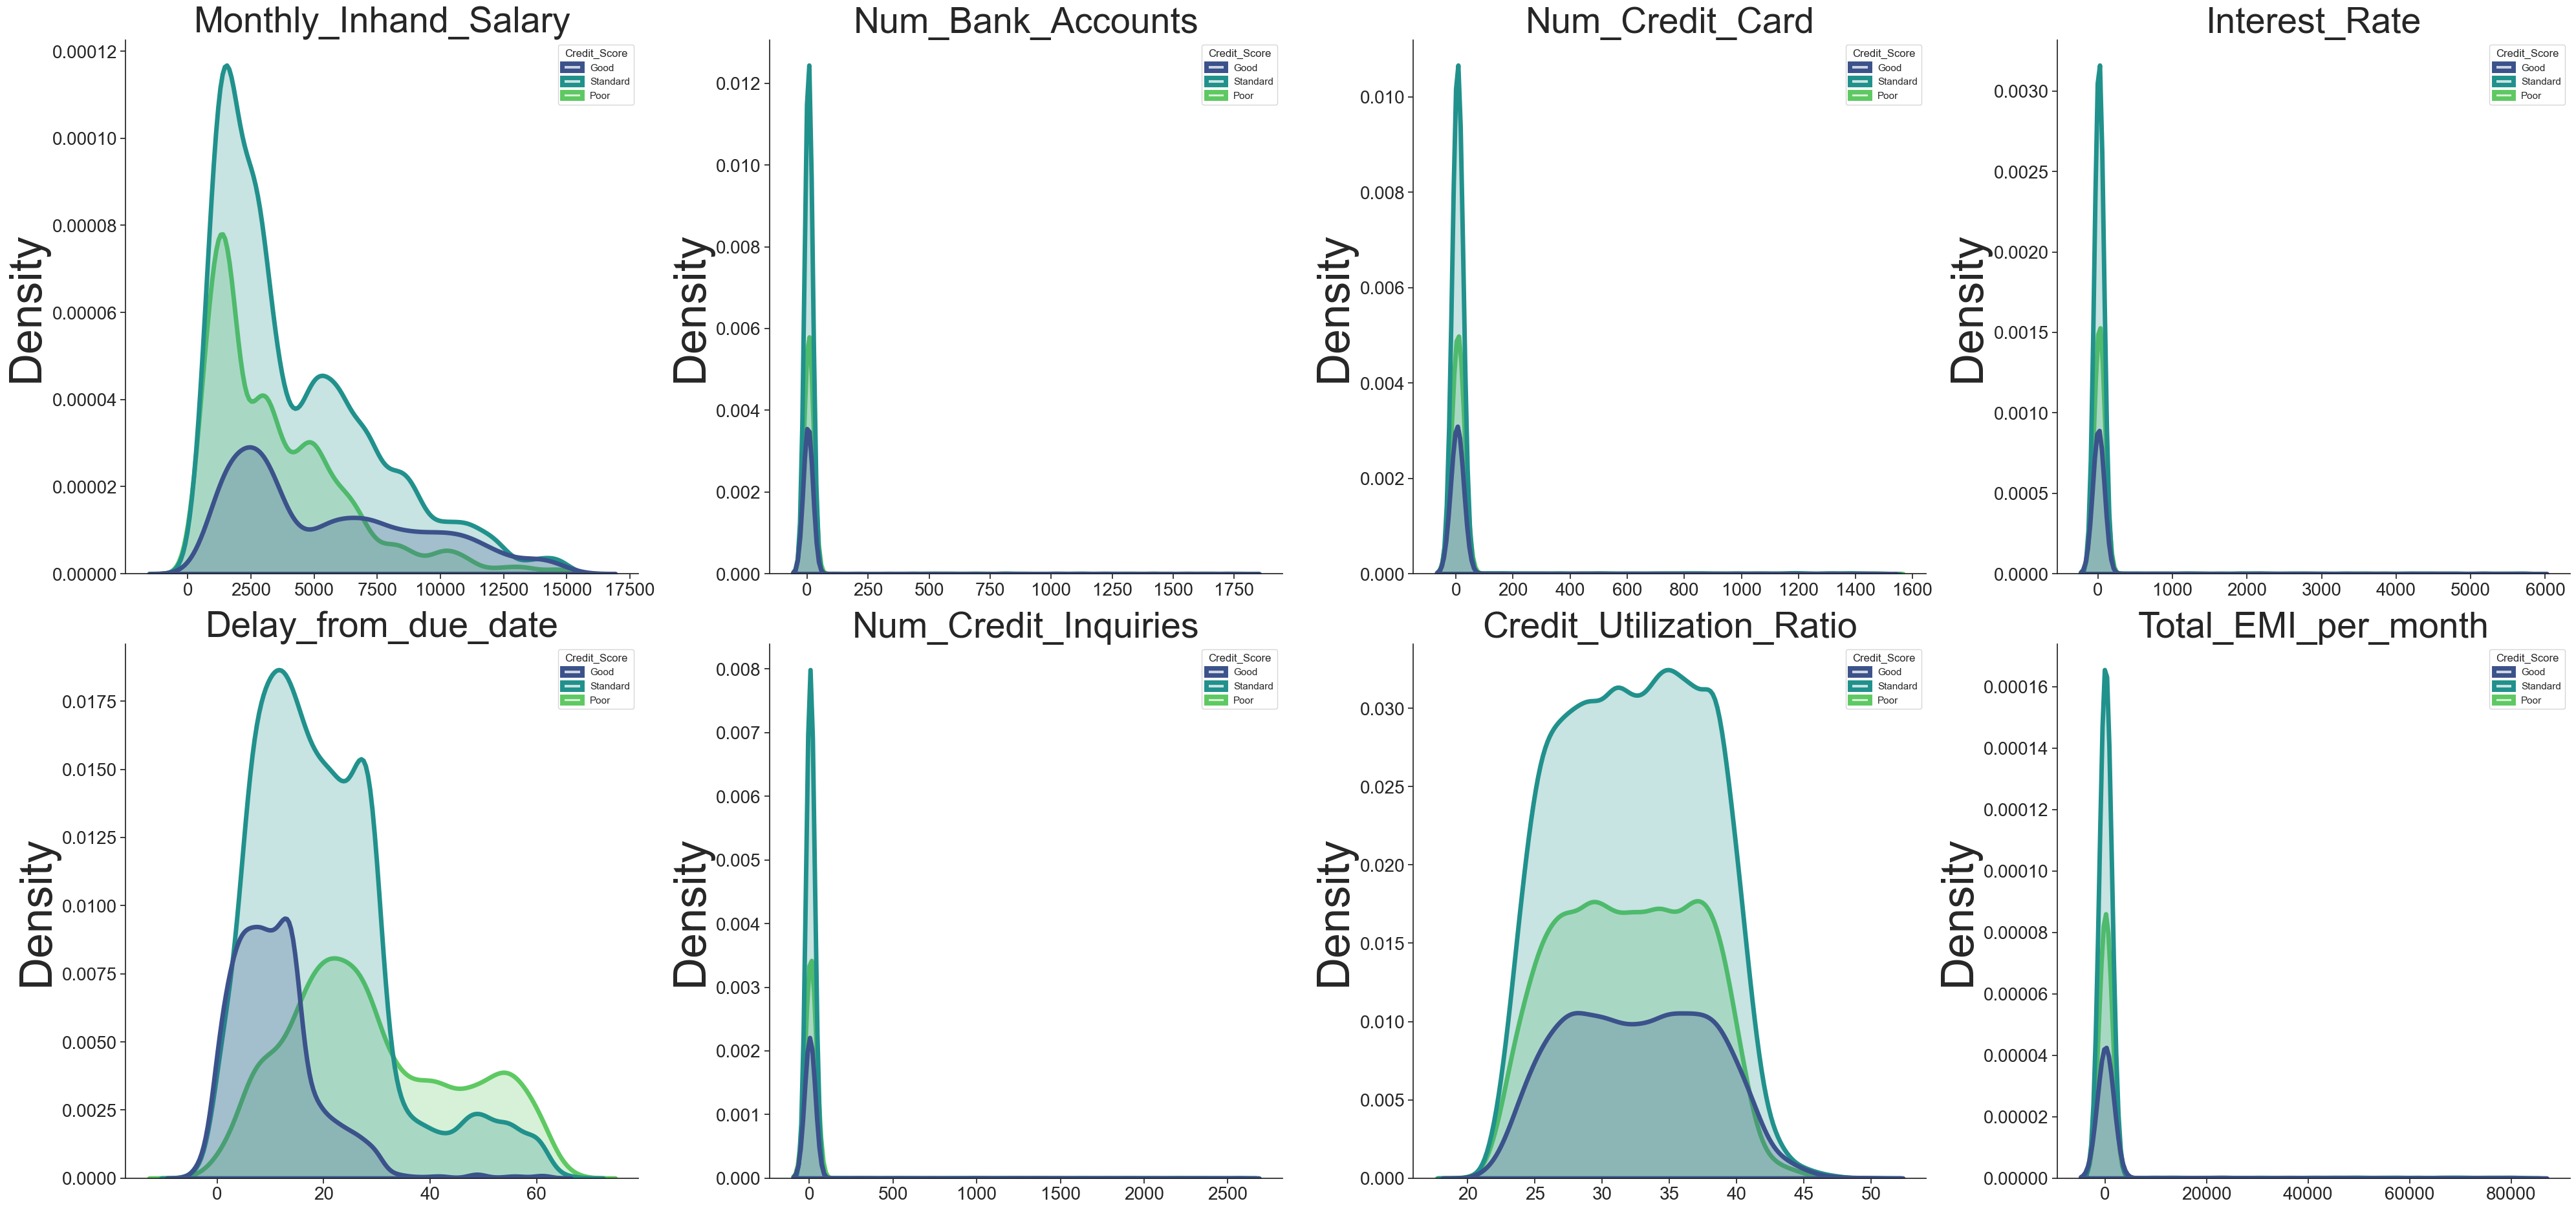

In [25]:
# Concatenate with y
eda_1 = pd.concat([eda, y], axis=1)

# Plot
# Numeric features analysis
plt.figure(figsize=(40, 140))
for i in range(0, len(num)):
    plt.subplot(15, 4, i + 1)
    sns.kdeplot(x=eda_1[num[i]], palette='viridis', shade=True, hue=eda_1['Credit_Score'], linewidth=5)  # Increase linewidth
    plt.title(num[i], fontsize=40)
    plt.xlabel('')
    plt.ylabel('Density', fontsize=50)  # Add y-axis label
    plt.xticks(fontsize=20)  # Set x-axis tick font size
    plt.yticks(fontsize=20)  # Set y-axis tick font size
    plt.tight_layout()

plt.show()

### Categorical Feature Analysis

In [26]:
eda[cat].nunique()


ID                         30000
Customer_ID                 3750
Month                          8
Name                        3508
Age                          627
SSN                         3751
Occupation                    16
Annual_Income               5656
Num_of_Loan                  143
Type_of_Loan                2191
Num_of_Delayed_Payment       266
Changed_Credit_Limit        3266
Credit_Mix                     4
Outstanding_Debt            4026
Credit_History_Age           404
Payment_of_Min_Amount          3
Amount_invested_monthly    27359
Payment_Behaviour              7
Monthly_Balance            29602
dtype: int64

In [27]:
cat1 = cat[:-1]
len(cat1)

18

### Data visualizatoin by heatmap

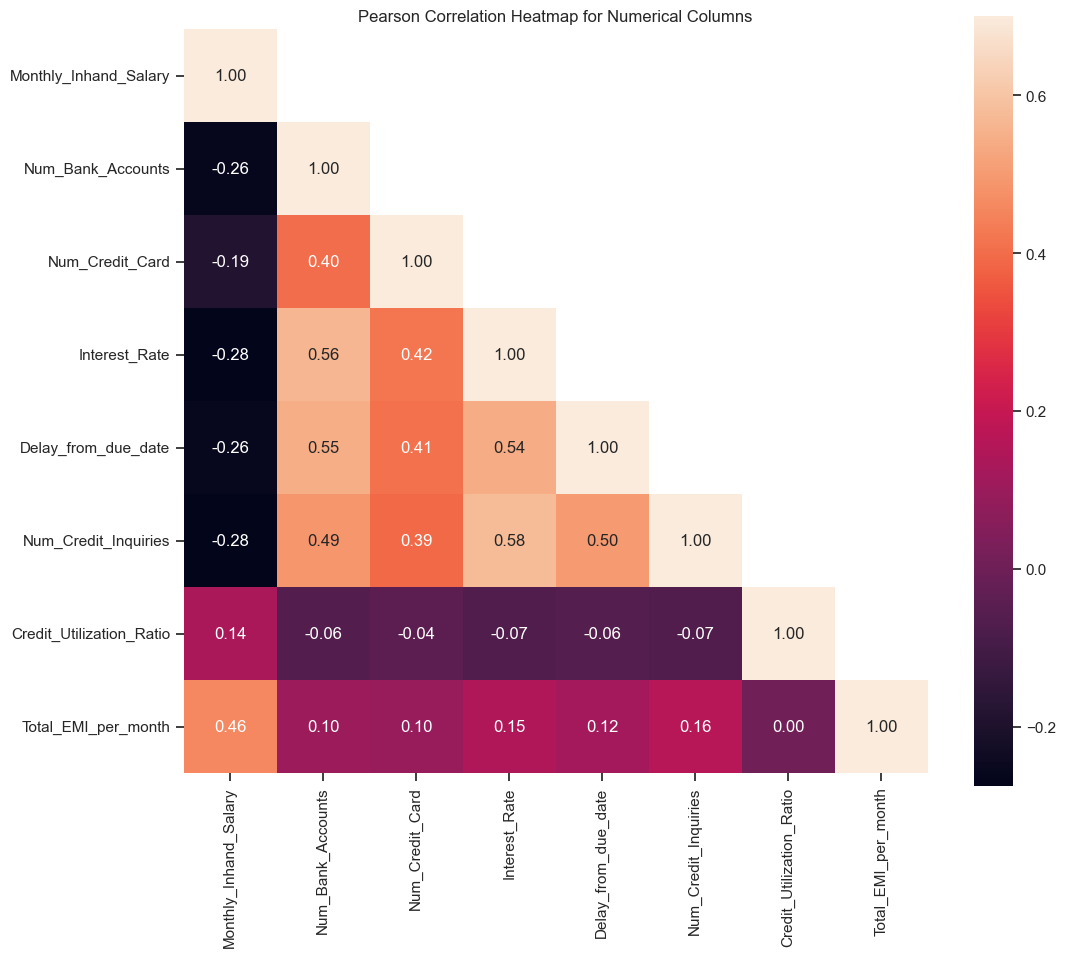

In [28]:

numerical_cols = eda.select_dtypes(include=['int64', 'float64']).columns

# Create a DataFrame with only numerical columns
numerical_data = eda[numerical_cols]

# Create correlation matrix using Pearson method for these numerical columns
corr = numerical_data.corr(method='spearman')

# Create a mask to hide the upper triangle for better visualization
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask = mask, vmax = 0.7, square = True, annot = True, fmt='.2f')
plt.title('Pearson Correlation Heatmap for Numerical Columns')
plt.show()

In [29]:
eda[cat1].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       30000 non-null  object
 1   Customer_ID              30000 non-null  object
 2   Month                    30000 non-null  object
 3   Name                     26988 non-null  object
 4   Age                      30000 non-null  object
 5   SSN                      30000 non-null  object
 6   Occupation               30000 non-null  object
 7   Annual_Income            30000 non-null  object
 8   Num_of_Loan              30000 non-null  object
 9   Type_of_Loan             26576 non-null  object
 10  Num_of_Delayed_Payment   27869 non-null  object
 11  Changed_Credit_Limit     30000 non-null  object
 12  Credit_Mix               30000 non-null  object
 13  Outstanding_Debt         30000 non-null  object
 14  Credit_History_Age       27230 non-nul

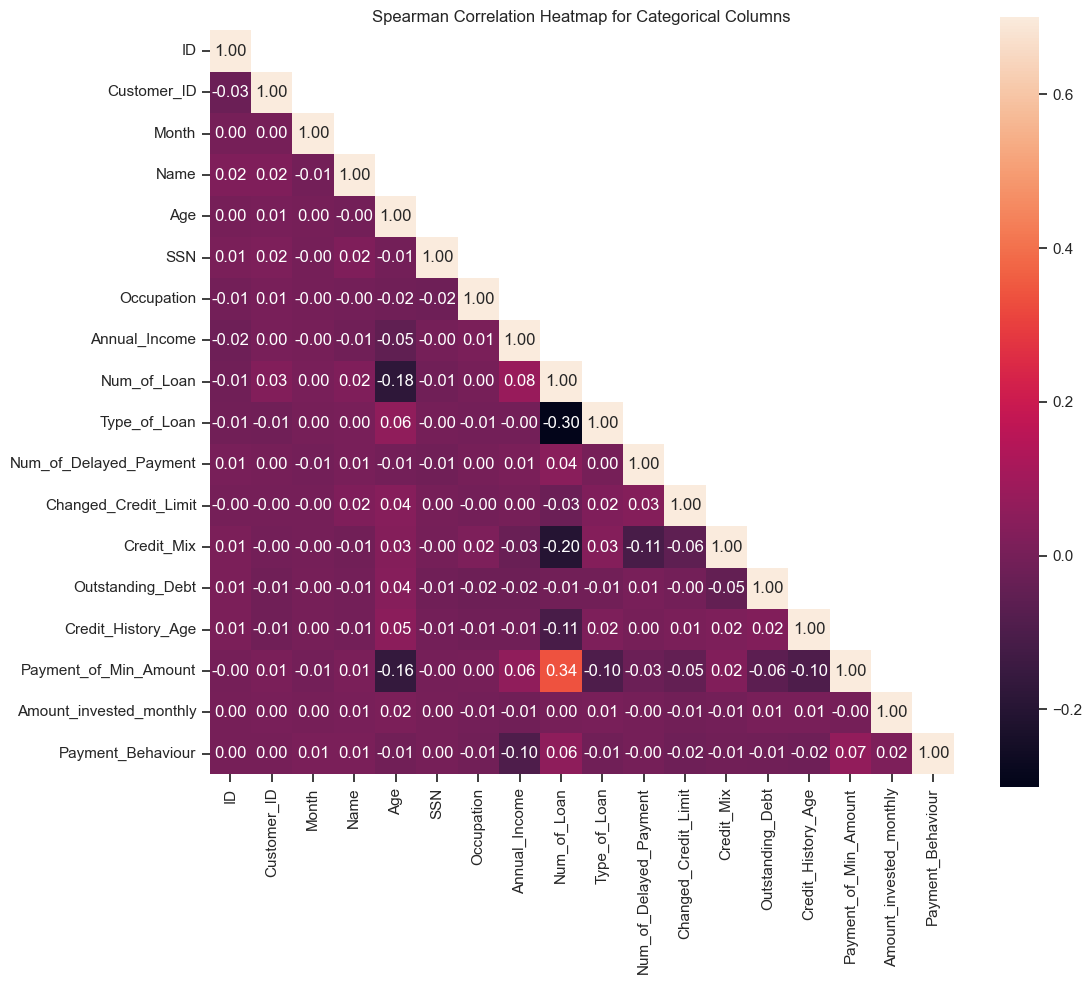

In [30]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in cat1:
    eda[col] = label_encoder.fit_transform(eda[col])

# Calculate correlation matrix using Spearman method for categorical columns
corr = eda[cat1].corr(method='spearman')

# Create a mask to hide the upper triangle for better visualization
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask=mask, vmax=0.7, square=True, annot=True, fmt='.2f')
plt.title('Spearman Correlation Heatmap for Categorical Columns')
plt.show()


### Drop Unused Feature
### Drop columns and split the data train

In [31]:
# Select specific columns from df_train
column_names_train = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
df_train = df_train[column_names_train]

# Select specific columns from df_test
column_names_test = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
                     'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                     'Credit_History_Age', 'Payment_of_Min_Amount',
                     'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

# Select the columns from df_test using the correct list of column names
df_test = df_test[column_names_test]

# Print the column names of df_test after modification
print(df_test.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')


In [86]:
# X_trains = x.copy 
# y_trains = y.copy 
#Define X and Y from df_train
# X_trains = eda.drop('Credit_Score', axis=1)
# y_trains = eda['Credit_Score']
X_trains = df_train.drop('Credit_Score', axis=1)
y_trains = df_train['Credit_Score']


In [112]:
X_trains

ID Customer_ID     Month           Name   Age          SSN   
0      0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  \
1      0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2      0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3      0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4      0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...       ...         ...       ...            ...   ...          ...   
29995  0xc5c1  CUS_0x5ee7     April            NaN    55    #F%$D@*&8   
29996  0xc5c2  CUS_0x5ee7       May        Halpinx    55  674-29-2346   
29997  0xc5c3  CUS_0x5ee7      June            NaN    55  674-29-2346   
29998  0xc5c4  CUS_0x5ee7      July        Halpinx    55  674-29-2346   
29999  0xc5c5  CUS_0x5ee7    August            NaN    55  674-29-2346   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts   
0      Scientist      19114.12            1824.843333                  3  \
1      Scientist      19114.12                    NaN                  3   
2      Scientist      19114.12                    NaN                  3   
3      Scientist      19114.12                    NaN                  3   
4      Scientist      19114.12            1824.843333                  3   
...          ...           ...                    ...                ...   
29995  Developer      92127.24            7849.270000                  5   
29996  Developer      92127.24            7849.270000                  5   
29997  Developer      92127.24            7849.270000                  5   
29998  Developer      92127.24            7849.270000                  5   
29999  Developer      92127.24            7849.270000                  5   

      Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio   
0              _           809.98                 26.822620  \
1           Good           809.98                 31.944960   
2           Good           809.98                 28.609352   
3           Good           809.98                 31.377862   
4           Good           809.98                 24.797347   
...          ...              ...                       ...   
29995       Good           487.54                 38.876878   
29996       Good           487.54                 33.743466   
29997          _           487.54                 33.359951   
29998          _           487.54                 31.643809   
29999       Good           487.54                 34.563176   

           Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly   
0       22 Years and 1 Months                    No       80.41529543900253  \
1                         NaN                    No      118.28022162236736   
2       22 Years and 3 Months                    No         81.699521264648   
3       22 Years and 4 Months                    No       199.4580743910713   
4       22 Years and 5 Months                    No      41.420153086217326   
...                       ...                   ...                     ...   
29995  20 Years and 11 Months                    No      291.50094465170713   
29996                     NaN                    No      130.69831234151766   
29997   21 Years and 1 Months                    No       73.92291353343492   
29998                     NaN                    No      141.10174074782742   
29999   21 Years and 3 Months                    No       52.51875773118915   

                      Payment_Behaviour     Monthly_Balance  
0       High_spent_Small_value_payments  312.49408867943663  
1        Low_spent_Large_value_payments  284.62916249607184  
2       Low_spent_Medium_value_payments   331.2098628537912  
3        Low_spent_Small_value_payments  223.45130972736786  
4      High_spent_Medium_value_payments  341.48923103222177  
...                                 ...                 ...  
29995  High_spent_Medium_value_payments   567.5101110874242  
29996   High_spent_

In [113]:
y_trains

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
29995    Standard
29996        Poor
29997        Poor
29998        Poor
29999        Poor
Name: Credit_Score, Length: 30000, dtype: object

### To filter out NaN values from your data before using SMOTE

In [156]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming X_train and y_train are your feature and target matrices
# First, create a DataFrame for better handling of mixed data types
df = pd.DataFrame(X_trains)  # Convert X_train to DataFrame if it's not already
df['Target'] = y_trains  # Add y_train as a new column

# Check and impute missing values for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# For categorical data, you might want to fill NaNs with the mode or a specific value
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[numeric_cols], y_trains, test_size=0.20, random_state=42)

# Print shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
# Now your DataFrame `df` should have no NaNs and you can proceed with any further processing

X_train shape: (24000, 3)
X_test shape: (6000, 3)


In [62]:
# # split data
# X_train, X_test, y_train, y_test = train_test_split(X_trains, np.reshape(y_trains,(-1,1)), test_size=0.20, random_state=42)
# X_train.shape, X_test.shape

#Handling Imbalanced

In [148]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Make sure X_train is a DataFrame; if it's not already, convert it.
X_train = pd.DataFrame(X_train)

# Assuming 'Month' needs to be encoded and is the first column
label_encoder = LabelEncoder()
column_name = X_train.columns[0]  # This assumes 'Month' is the first column
X_train[column_name] = label_encoder.fit_transform(X_train[column_name])

# Apply one-hot encoding
X_train = pd.get_dummies(X_train, sparse=True)

# Check the result
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 21753 to 23654
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Monthly_Inhand_Salary     24000 non-null  int64  
 1   Num_Bank_Accounts         24000 non-null  float64
 2   Credit_Utilization_Ratio  24000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 750.0 KB
None


In [150]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Check if there are samples in the training data before applying SMOTE
if len(X_train) == 0:
    print("Error: No samples in the training data.")
else:
    # Apply SMOTE for handling class imbalance
    smote = SMOTE(random_state=0)
    try:
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        # Check the shape of resampled data
        print("Resampled training data shape:", X_train_resampled.shape, y_train_resampled.shape)
        
        # Now you can use X_train_resampled and y_train_resampled for training your model
    except ValueError as e:
        print("Error during SMOTE:", e)

Resampled training data shape: (38220, 3) (38220,)


# Creating models with data train

## 1. k-NN

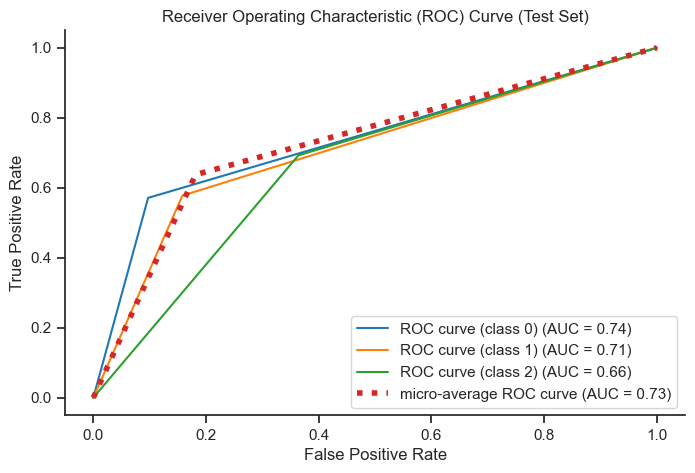

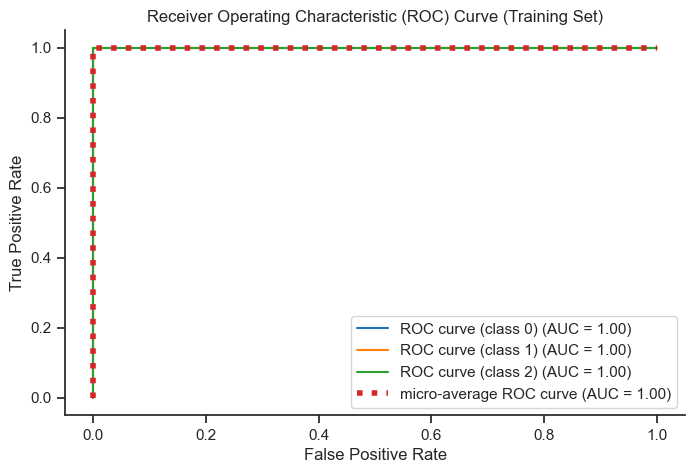

Confusion matrix(KNN) for Test Set: 
 [[   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [ 595   78  369    0    0    0]
 [  94 1028  658    0    0    0]
 [ 388  589 2201    0    0    0]]
Classification report(KNN) for Test Set: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
        Good       0.00      0.00      0.00    1042.0
        Poor       0.00      0.00      0.00    1780.0
    Standard       0.00      0.00      0.00    3178.0

    accuracy                           0.00    6000.0
   macro avg       0.00      0.00      0.00    6000.0
weighted avg       0.00      0.00      0.00    6000.0



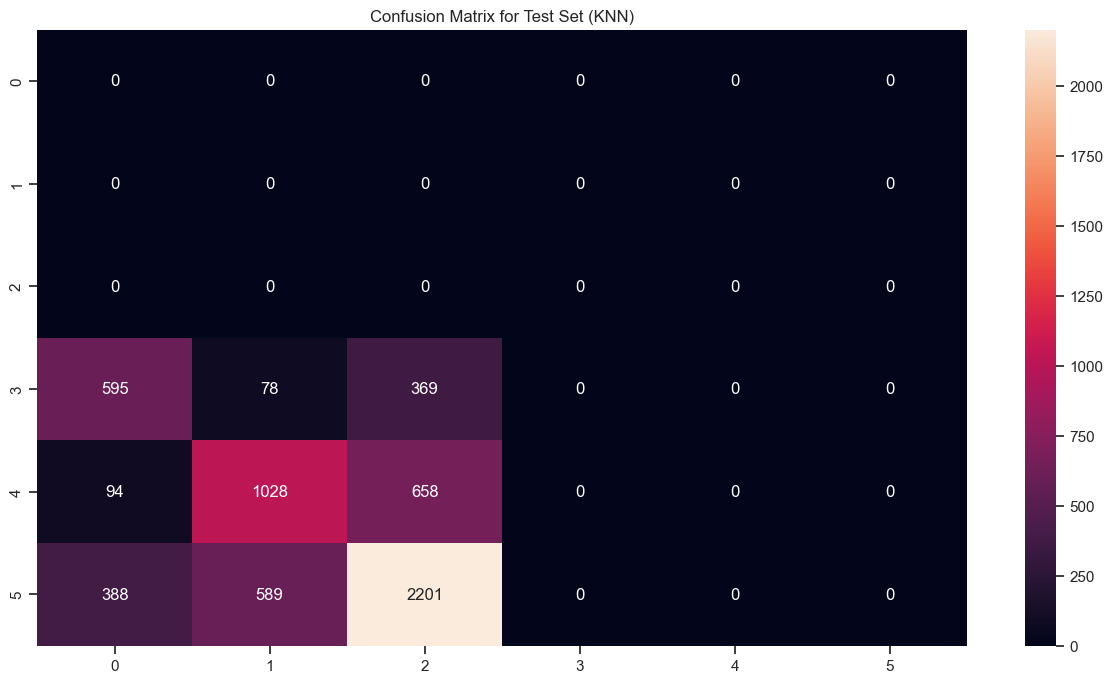

Confusion matrix(KNN) for Training Set: 
 [[    0     0     0     0     0     0]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]
 [ 1607   141  2582     0     0     0]
 [  417  2896  3617     0     0     0]
 [  839  1485 10416     0     0     0]]
Classification report(KNN) for Training Set: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
        Good       0.00      0.00      0.00    4330.0
        Poor       0.00      0.00      0.00    6930.0
    Standard       0.00      0.00      0.00   12740.0

    accuracy                           0.00   24000.0
   macro avg       0.00      0.00      0.00   24000.0
weighted avg       0.00      0.00      0.00   24000.0



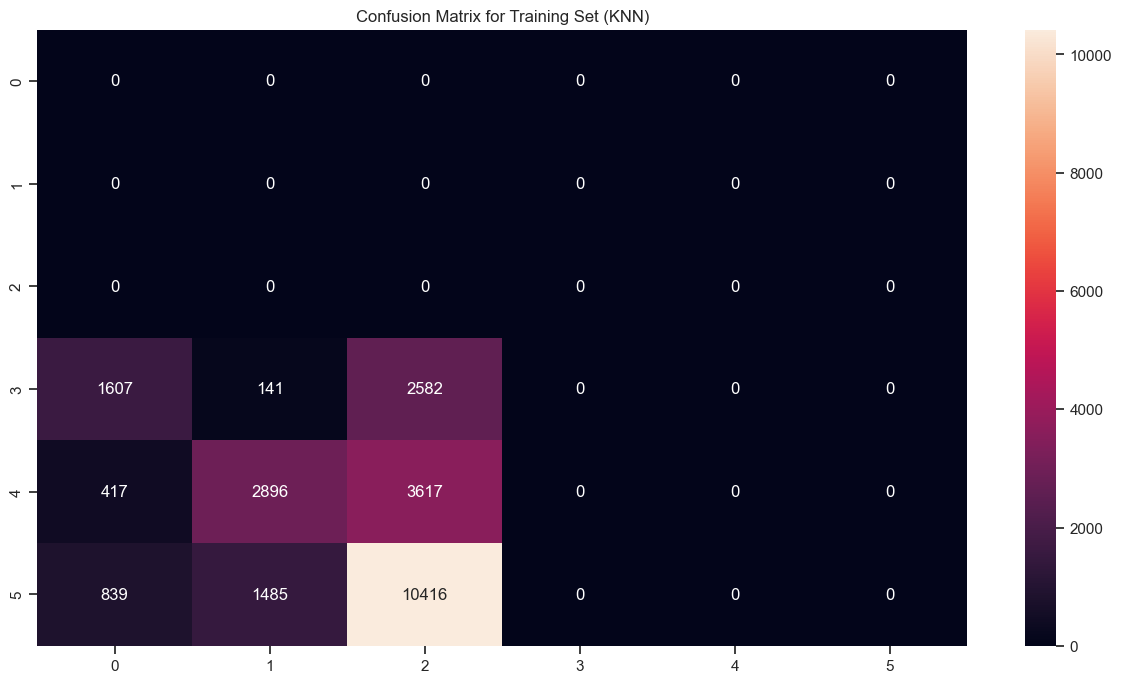

ROC and AUC values for the training set:
Class 0 - ROC: 1.00
Class 1 - ROC: 1.00
Class 2 - ROC: 1.00
Micro-average - ROC: 1.00
ROC and AUC values for the test set:
Class 0 - ROC: 0.74
Class 1 - ROC: 0.71
Class 2 - ROC: 0.66
Micro-average - ROC: 0.73


In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Binarize the labels for both test and training sets
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
X_test_imputed = imputer.fit_transform(X_test)
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Train the classifier using OneVsRest strategy
classifier = OneVsRestClassifier(knn)
classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_score_test = classifier.predict_proba(X_test_imputed)

# Compute ROC curve and ROC area for each class for the test set
fpr_test = {}
tpr_test = {}
roc_auc_test = {}
for i in range(len(np.unique(y_test))):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Compute micro-average ROC curve and ROC area for the test set
fpr_test["micro"], tpr_test["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_test.ravel())
roc_auc_test["micro"] = auc(fpr_test["micro"], tpr_test["micro"])

# Plot ROC curve for each class for the test set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_test[i]:0.2f})')

plt.plot(fpr_test["micro"], tpr_test["micro"], label=f'micro-average ROC curve (AUC = {roc_auc_test["micro"]:0.2f})', linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend()
plt.show()

# Predict probabilities on the training set
y_score_train = classifier.predict_proba(X_train)

# Compute ROC curve and ROC area for each class for the training set
fpr_train = {}
tpr_train = {}
roc_auc_train = {}
for i in range(len(np.unique(y_train))):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_score_train[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Compute micro-average ROC curve and ROC area for the training set
fpr_train["micro"], tpr_train["micro"], _ = roc_curve(y_train_bin.ravel(), y_score_train.ravel())
roc_auc_train["micro"] = auc(fpr_train["micro"], tpr_train["micro"])

# Plot ROC curve for each class for the training set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train[i], tpr_train[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_train[i]:0.2f})')

plt.plot(fpr_train["micro"], tpr_train["micro"], label=f'micro-average ROC curve (AUC = {roc_auc_train["micro"]:0.2f})', linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend()
plt.show()

# Convert all labels to string type
y_test = y_test.astype(str)
# Predict labels for the test set using the highest probability
y_pred_test = np.argmax(y_score_test, axis=1)
y_pred_test = y_pred_test.astype(str)

# Calculate confusion matrix for the test set
cm_knn_test = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix(KNN) for Test Set: \n', cm_knn_test)

# Print classification report for the test set
print('Classification report(KNN) for Test Set: \n', classification_report(y_test, y_pred_test))

# Visualize confusion matrix for the test set with seaborn library
sns.heatmap(cm_knn_test, annot=True, fmt="d") 
plt.title('Confusion Matrix for Test Set (KNN)')
plt.show()

# Predict probabilities on the training set
y_score_train = classifier.predict_proba(X_train)

# Convert all labels to string type for y_train and y_pred_train
y_train = y_train.astype(str)
y_pred_train = y_pred_train.astype(str)

# Calculate confusion matrix for the training set
cm_knn_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix(KNN) for Training Set: \n', cm_knn_train)

# Print classification report for the training set
print('Classification report(KNN) for Training Set: \n', classification_report(y_train, y_pred_train))

# Visualize confusion matrix for the training set with seaborn library
sns.heatmap(cm_knn_train, annot=True, fmt="d") 
plt.title('Confusion Matrix for Training Set (KNN)')
plt.show()

# Print ROC and AUC values for the training set
print("ROC and AUC values for the training set:")
for i in range(len(np.unique(y_train))):
    print(f"Class {i} - ROC: {roc_auc_train[i]:0.2f}")

print(f"Micro-average - ROC: {roc_auc_train['micro']:0.2f}")

# Print ROC and AUC values for the test set
print("ROC and AUC values for the test set:")
for i in range(len(np.unique(y_test))):
    print(f"Class {i} - ROC: {roc_auc_test[i]:0.2f}")

print(f"Micro-average - ROC: {roc_auc_test['micro']:0.2f}")



## 2. SVM

Classification report(SVM) for Test Set: 
               precision    recall  f1-score   support

        Good       0.58      0.16      0.25      1042
        Poor       0.56      0.24      0.34      1780
    Standard       0.57      0.88      0.69      3178

    accuracy                           0.57      6000
   macro avg       0.57      0.43      0.43      6000
weighted avg       0.57      0.57      0.51      6000

Accuracy score(SVM) for Test Set:  0.566


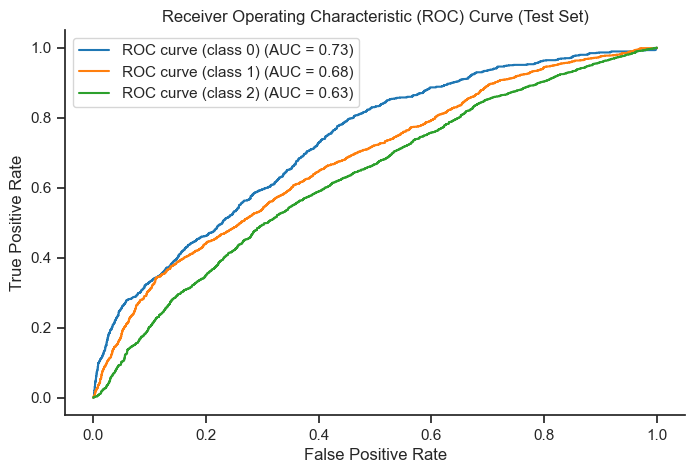

Micro-average ROC for Test Set: 0.7421104791666666
Confusion matrix(SVM) for Test Set: 
 [[ 168   52  822]
 [  25  430 1325]
 [  97  283 2798]]


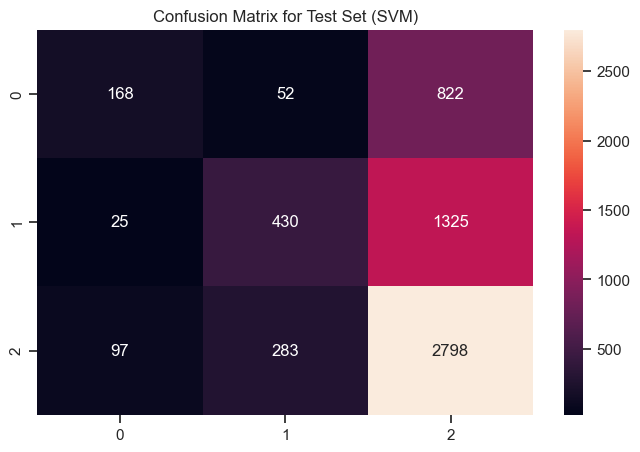

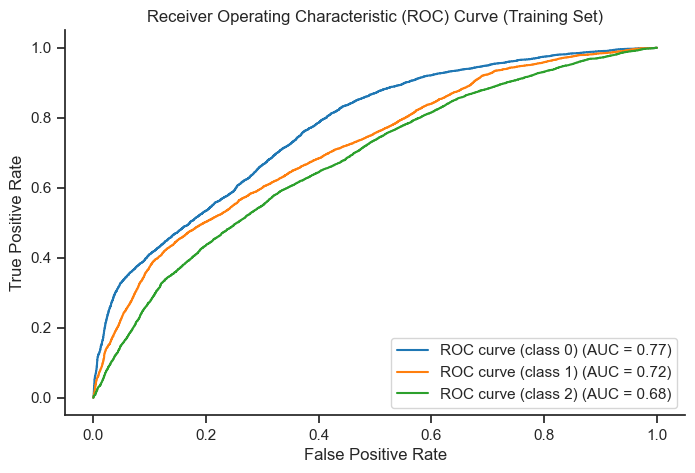

Micro-average ROC for Training Set: 0.7598404995659722
Confusion matrix(SVM) for Training Set: 
 [[  887   229  3214]
 [  109  1991  4830]
 [  309  1046 11385]]


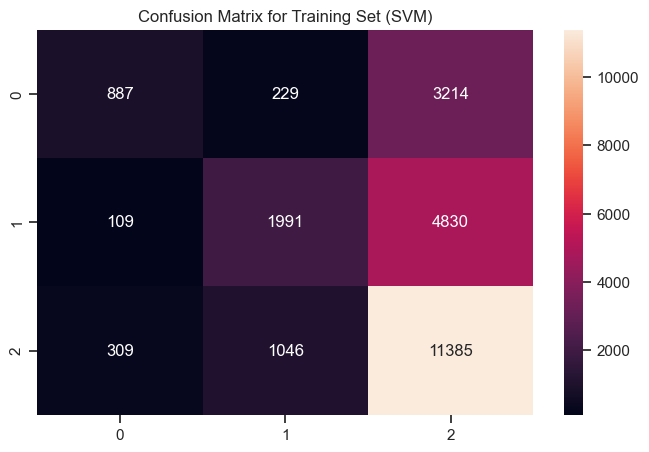

In [226]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier

# Train the SVM classifier
clf = svm.SVC(gamma=0.001, probability=True)

# Fit the classifier using the One-vs-Rest strategy
classifier = OneVsRestClassifier(clf)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Predict on the training set
y_pred_train = classifier.predict(X_train)

# Print classification report for the test set
print('Classification report(SVM) for Test Set: \n', classification_report(y_test, y_pred))

# Print accuracy score for the test set
print('Accuracy score(SVM) for Test Set: ', accuracy_score(y_test, y_pred))

# Predict probabilities on the test set
y_score = classifier.predict_proba(X_test)

# Binarize the labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class for the test set
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class for the test set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend()
plt.show()

# Calculate micro-average ROC and AUC for the test set
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
print('Micro-average ROC for Test Set:', roc_auc_micro)

# Calculate confusion matrix for the test set
cm_svm_test = confusion_matrix(y_test, y_pred)
print('Confusion matrix(SVM) for Test Set: \n', cm_svm_test)

# Visualize confusion matrix for the test set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_svm_test, annot=True, fmt="d") 
plt.title('Confusion Matrix for Test Set (SVM)')
plt.show()

# Compute ROC curve and AUC for each class for the training set
y_score_train = classifier.predict_proba(X_train)
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
for i in range(len(np.unique(y_train))):
    fpr_train[i], tpr_train[i], _ = roc_curve(label_binarize(y_train, classes=np.unique(y_train))[:, i], y_score_train[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plot ROC curve for each class for the training set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train[i], tpr_train[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_train[i]:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend()
plt.show()

# Calculate micro-average ROC and AUC for the training set
fpr_micro_train, tpr_micro_train, _ = roc_curve(label_binarize(y_train, classes=np.unique(y_train)).ravel(), y_score_train.ravel())
roc_auc_micro_train = auc(fpr_micro_train, tpr_micro_train)
print('Micro-average ROC for Training Set:', roc_auc_micro_train)

# Calculate confusion matrix for the training set
cm_svm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix(SVM) for Training Set: \n', cm_svm_train)

# Visualize confusion matrix for the training set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_svm_train, annot=True, fmt="d") 
plt.title('Confusion Matrix for Training Set (SVM)')
plt.show()

## 3. Decision Tree

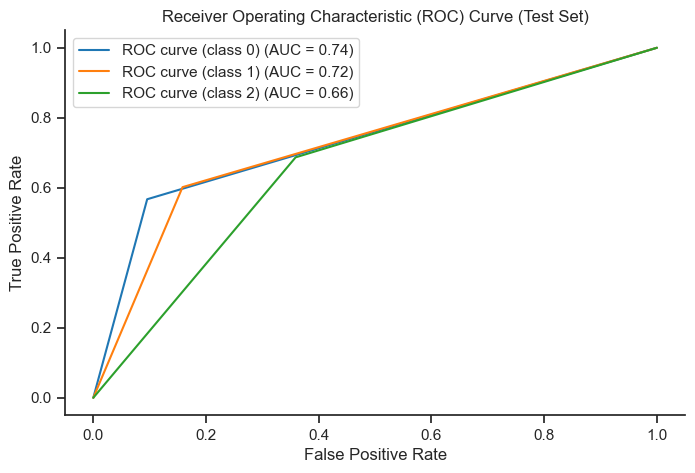

Test Set:
Class 0 - ROC: 0.74
Class 1 - ROC: 0.72
Class 2 - ROC: 0.66


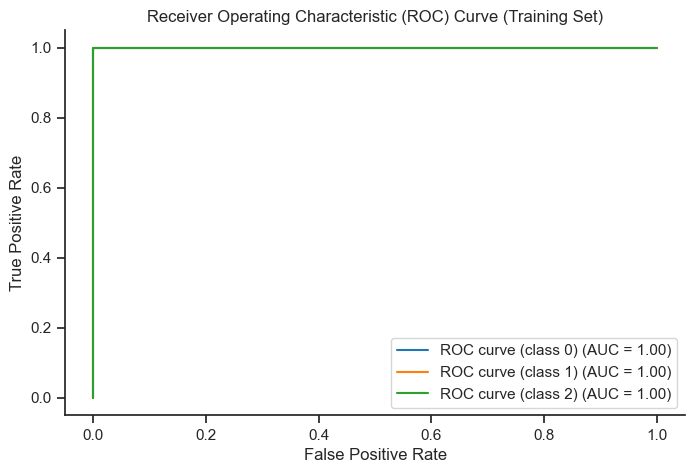


Training Set:
Class 0 - ROC: 1.00
Class 1 - ROC: 1.00
Class 2 - ROC: 1.00

Confusion Matrix (Test Set):
[[ 591   64  387]
 [  83 1071  626]
 [ 391  604 2183]]


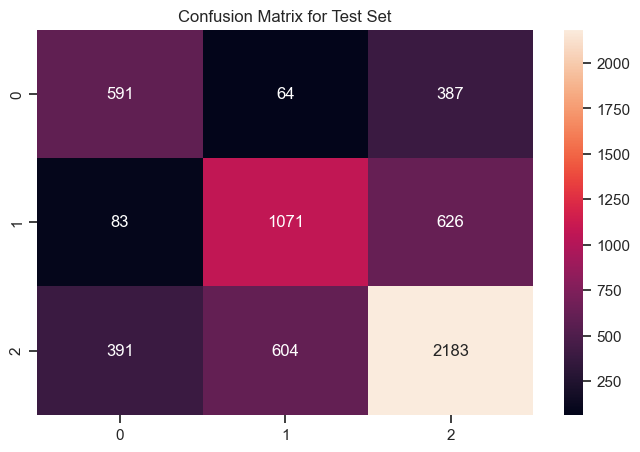


Confusion Matrix (Training Set):
[[ 4330     0     0]
 [    0  6930     0]
 [    0     0 12740]]


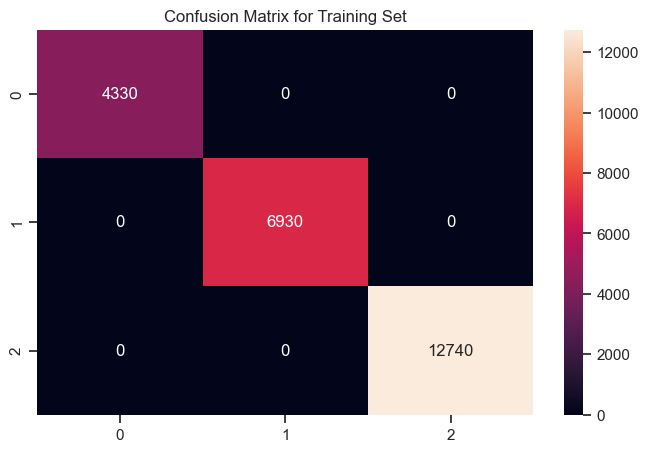

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_score_test = clf.predict_proba(X_test)

# Predict probabilities on the training set
y_score_train = clf.predict_proba(X_train)

# Binarize the labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))

# Compute ROC curve and AUC for each class for the test set
fpr_test = {}
tpr_test = {}
roc_auc_test = {}
for i in range(len(np.unique(y_test))):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Compute ROC curve and AUC for each class for the training set
fpr_train = {}
tpr_train = {}
roc_auc_train = {}
for i in range(len(np.unique(y_train))):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_score_train[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plot ROC curve for each class for the test set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_test[i]:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend()
plt.show()

# Print ROC and AUC values for the test set
print("Test Set:")
for i in range(len(np.unique(y_test))):
    print(f"Class {i} - ROC: {roc_auc_test[i]:0.2f}")

# Plot ROC curve for each class for the training set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train[i], tpr_train[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_train[i]:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend()
plt.show()

# Print ROC and AUC values for the training set
print("\nTraining Set:")
for i in range(len(np.unique(y_train))):
    print(f"Class {i} - ROC: {roc_auc_train[i]:0.2f}")

# Calculate confusion matrix for the test set
cm_test = confusion_matrix(y_test, clf.predict(X_test))

# Print confusion matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(cm_test)

# Visualize confusion matrix for the test set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_test, annot=True, fmt="d") 
plt.title('Confusion Matrix for Test Set')
plt.show()

# Calculate confusion matrix for the training set
cm_train = confusion_matrix(y_train, clf.predict(X_train))

# Print confusion matrix for the training set
print("\nConfusion Matrix (Training Set):")
print(cm_train)

# Visualize confusion matrix for the training set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_train, annot=True, fmt="d") 
plt.title('Confusion Matrix for Training Set')
plt.show()

## 4. Multinomioal Naive Bayes

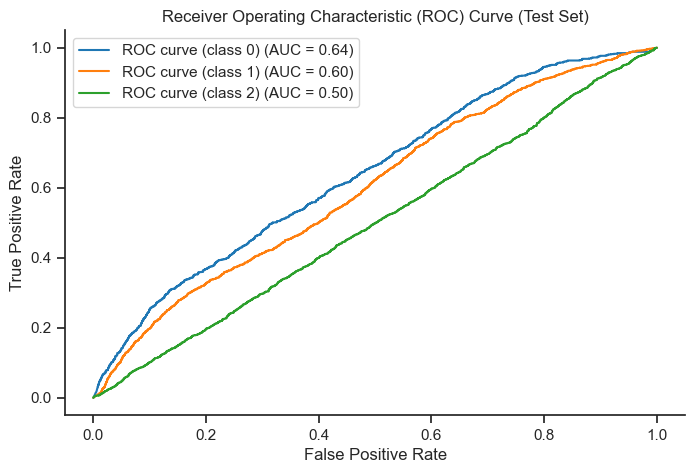

Test Set:
Class 0 - ROC: 0.64
Class 1 - ROC: 0.60
Class 2 - ROC: 0.50


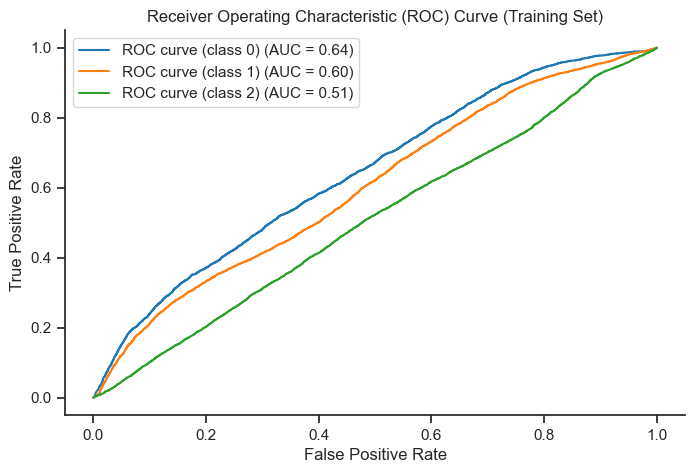


Training Set:
Class 0 - ROC: 0.64
Class 1 - ROC: 0.60
Class 2 - ROC: 0.51

Confusion Matrix (Test Set):
[[ 664  182  196]
 [ 738  702  340]
 [1595  998  585]]


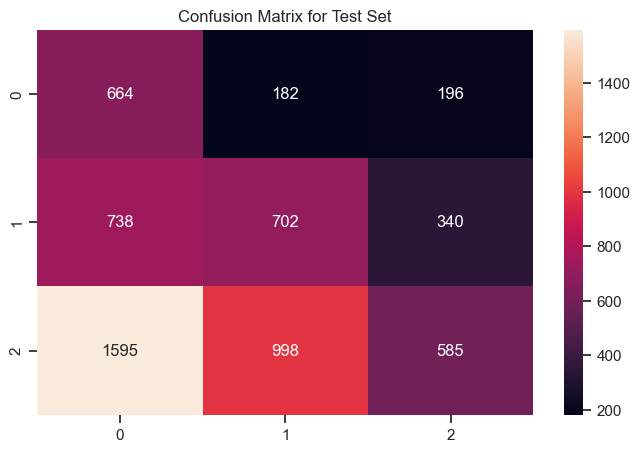


Confusion Matrix (Training Set):
[[2820  761  749]
 [2942 2735 1253]
 [6451 3991 2298]]


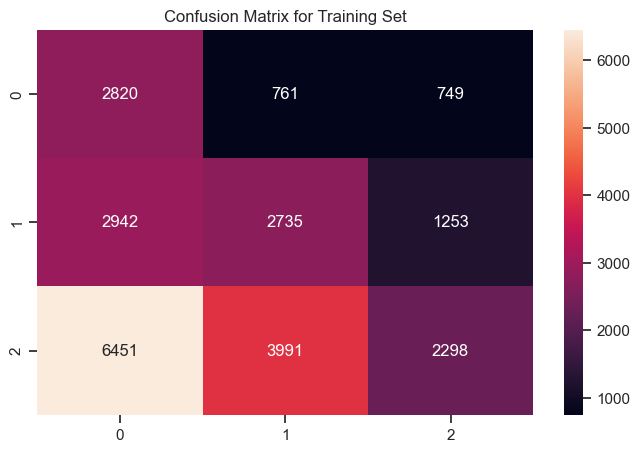

In [206]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Predict probabilities on the test set
y_score_test = naive_bayes.predict_proba(X_test)

# Predict probabilities on the training set
y_score_train = naive_bayes.predict_proba(X_train)

# Binarize the labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))

# Compute ROC curve and AUC for each class for the test set
fpr_test = {}
tpr_test = {}
roc_auc_test = {}
for i in range(len(np.unique(y_test))):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Compute ROC curve and AUC for each class for the training set
fpr_train = {}
tpr_train = {}
roc_auc_train = {}
for i in range(len(np.unique(y_train))):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_score_train[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plot ROC curve for each class for the test set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_test[i]:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend()
plt.show()

# Print ROC and AUC values for the test set
print("Test Set:")
for i in range(len(np.unique(y_test))):
    print(f"Class {i} - ROC: {roc_auc_test[i]:0.2f}")

# Plot ROC curve for each class for the training set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train[i], tpr_train[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_train[i]:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend()
plt.show()

# Print ROC and AUC values for the training set
print("\nTraining Set:")
for i in range(len(np.unique(y_train))):
    print(f"Class {i} - ROC: {roc_auc_train[i]:0.2f}")

# Calculate confusion matrix for the test set
cm_test = confusion_matrix(y_test, naive_bayes.predict(X_test))

# Print confusion matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(cm_test)

# Visualize confusion matrix for the test set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_test, annot=True, fmt="d") 
plt.title('Confusion Matrix for Test Set')
plt.show()

# Calculate confusion matrix for the training set
cm_train = confusion_matrix(y_train, naive_bayes.predict(X_train))

# Print confusion matrix for the training set
print("\nConfusion Matrix (Training Set):")
print(cm_train)

# Visualize confusion matrix for the training set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_train, annot=True, fmt="d") 
plt.title('Confusion Matrix for Training Set')
plt.show()

## 5. Logistic Regression 

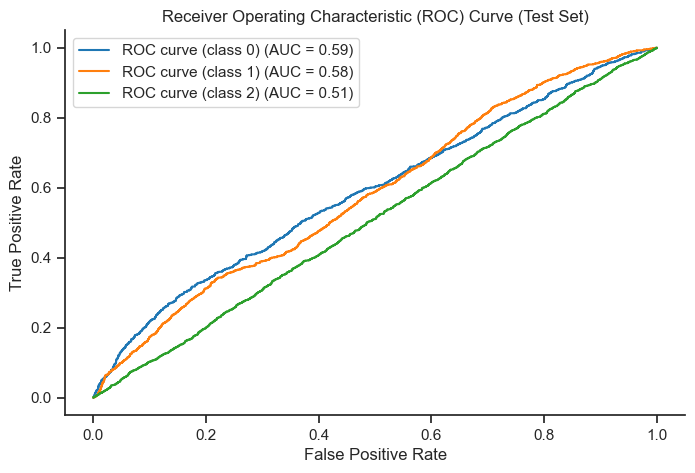

Test Set:
Class 0 - ROC: 0.59
Class 1 - ROC: 0.58
Class 2 - ROC: 0.51


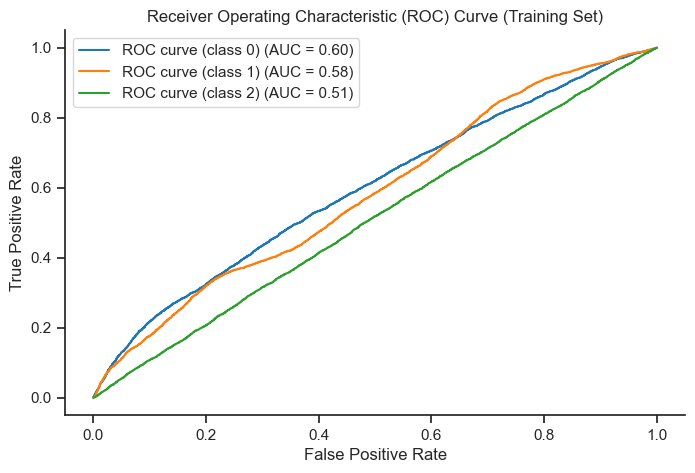


Training Set:
Class 0 - ROC: 0.60
Class 1 - ROC: 0.58
Class 2 - ROC: 0.51

Confusion Matrix (Test Set):
[[  17    0 1025]
 [   2    0 1778]
 [  19    0 3159]]


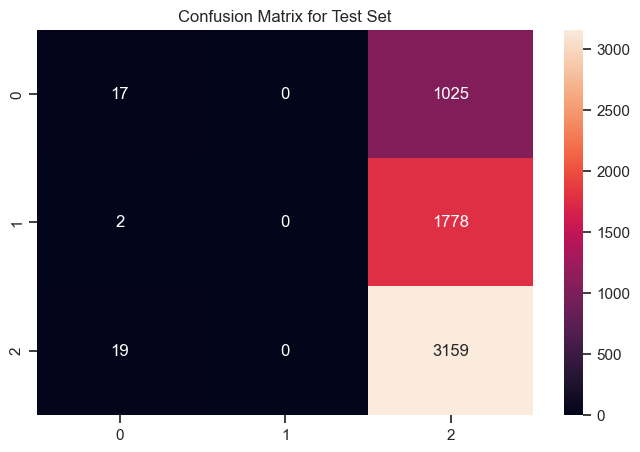


Confusion Matrix (Training Set):
[[   64     0  4266]
 [   20     0  6910]
 [   73     1 12666]]


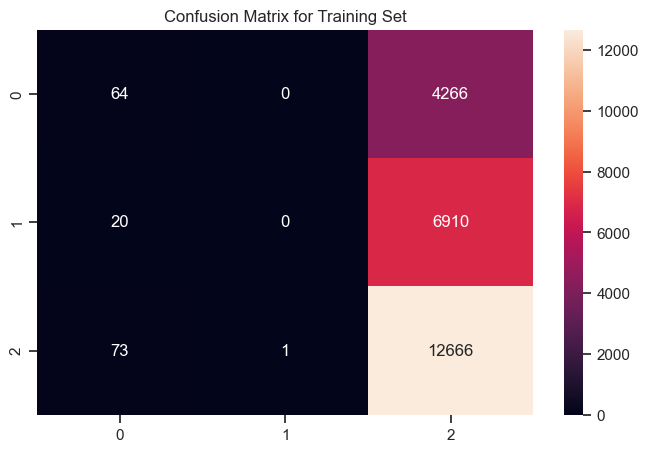

In [207]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression classifier
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_score_test = clf.predict_proba(X_test)

# Predict probabilities on the training set
y_score_train = clf.predict_proba(X_train)

# Binarize the labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))

# Compute ROC curve and AUC for each class for the test set
fpr_test = {}
tpr_test = {}
roc_auc_test = {}
for i in range(len(np.unique(y_test))):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Compute ROC curve and AUC for each class for the training set
fpr_train = {}
tpr_train = {}
roc_auc_train = {}
for i in range(len(np.unique(y_train))):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_score_train[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plot ROC curve for each class for the test set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_test[i]:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend()
plt.show()

# Print ROC and AUC values for the test set
print("Test Set:")
for i in range(len(np.unique(y_test))):
    print(f"Class {i} - ROC: {roc_auc_test[i]:0.2f}")

# Plot ROC curve for each class for the training set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train[i], tpr_train[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_train[i]:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend()
plt.show()

# Print ROC and AUC values for the training set
print("\nTraining Set:")
for i in range(len(np.unique(y_train))):
    print(f"Class {i} - ROC: {roc_auc_train[i]:0.2f}")

# Calculate confusion matrix for the test set
cm_test = confusion_matrix(y_test, clf.predict(X_test))

# Print confusion matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(cm_test)

# Visualize confusion matrix for the test set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_test, annot=True, fmt="d") 
plt.title('Confusion Matrix for Test Set')
plt.show()

# Calculate confusion matrix for the training set
cm_train = confusion_matrix(y_train, clf.predict(X_train))

# Print confusion matrix for the training set
print("\nConfusion Matrix (Training Set):")
print(cm_train)

# Visualize confusion matrix for the training set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_train, annot=True, fmt="d") 
plt.title('Confusion Matrix for Training Set')
plt.show()

## 6. Random Forest

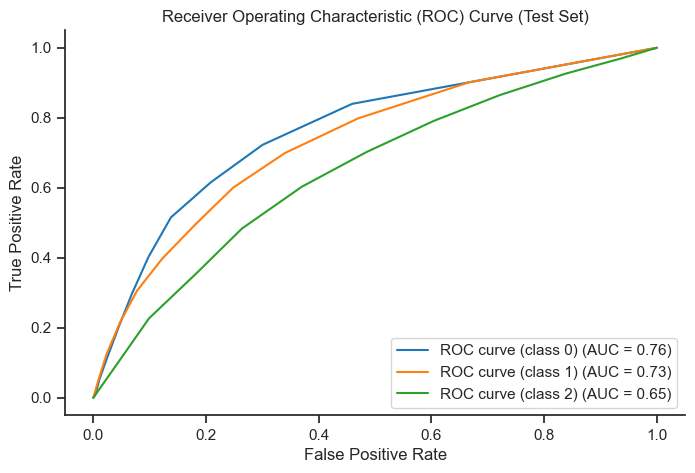

Test Set:
Class 0 - ROC: 0.76
Class 1 - ROC: 0.73
Class 2 - ROC: 0.65


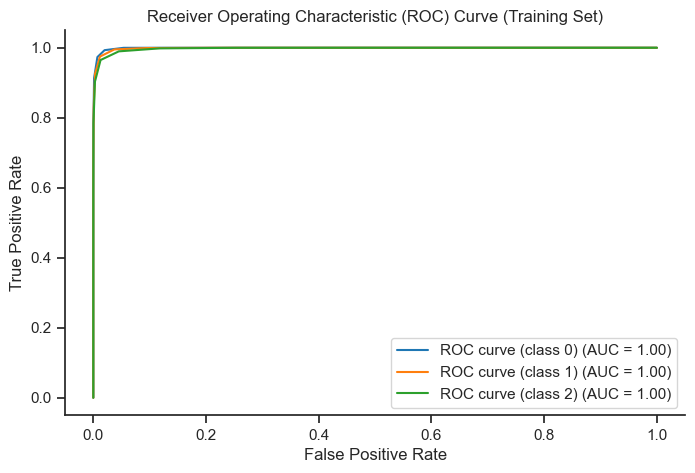


Training Set:
Class 0 - ROC: 1.00
Class 1 - ROC: 1.00
Class 2 - ROC: 1.00

Confusion Matrix (Test Set):
[[ 459  112  471]
 [ 134  912  734]
 [ 407  688 2083]]


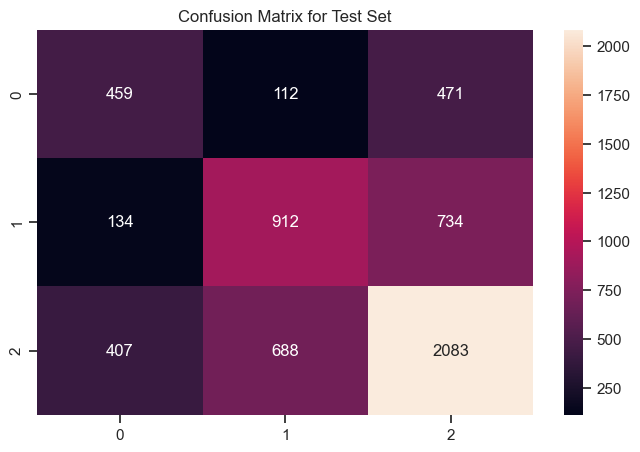


Confusion Matrix (Training Set):
[[ 4244     9    77]
 [   41  6761   128]
 [  123   194 12423]]


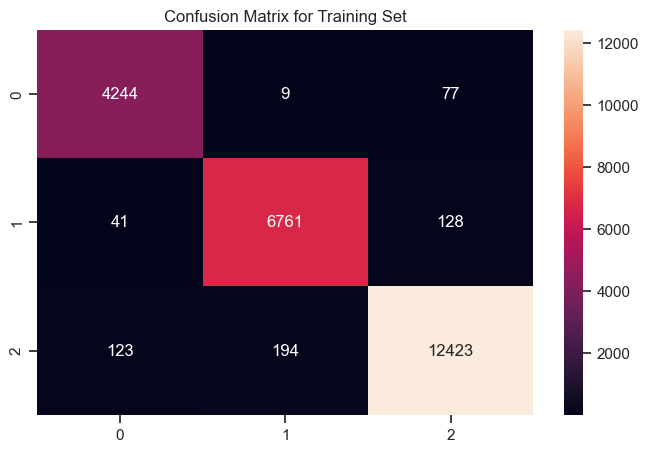

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_score_test = clf.predict_proba(X_test)

# Predict probabilities on the training set
y_score_train = clf.predict_proba(X_train)

# Binarize the labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))

# Compute ROC curve and AUC for each class for the test set
fpr_test = {}
tpr_test = {}
roc_auc_test = {}
for i in range(len(np.unique(y_test))):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Compute ROC curve and AUC for each class for the training set
fpr_train = {}
tpr_train = {}
roc_auc_train = {}
for i in range(len(np.unique(y_train))):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_score_train[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plot ROC curve for each class for the test set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_test[i]:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend()
plt.show()

# Print ROC and AUC values for the test set
print("Test Set:")
for i in range(len(np.unique(y_test))):
    print(f"Class {i} - ROC: {roc_auc_test[i]:0.2f}")

# Plot ROC curve for each class for the training set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train[i], tpr_train[i], label=f'ROC curve (class {i}) (AUC = {roc_auc_train[i]:0.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend()
plt.show()

# Print ROC and AUC values for the training set
print("\nTraining Set:")
for i in range(len(np.unique(y_train))):
    print(f"Class {i} - ROC: {roc_auc_train[i]:0.2f}")

# Calculate confusion matrix for the test set
cm_test = confusion_matrix(y_test, clf.predict(X_test))

# Print confusion matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(cm_test)

# Visualize confusion matrix for the test set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_test, annot=True, fmt="d") 
plt.title('Confusion Matrix for Test Set')
plt.show()

# Calculate confusion matrix for the training set
cm_train = confusion_matrix(y_train, clf.predict(X_train))

# Print confusion matrix for the training set
print("\nConfusion Matrix (Training Set):")
print(cm_train)

# Visualize confusion matrix for the training set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_train, annot=True, fmt="d") 
plt.title('Confusion Matrix for Training Set')
plt.show()

### 7. XGBoost 
### XGBoost (Extreme Gradient Boosting) is a popular ensemble method used in machine learning for classification and regression tasks. It constructs decision trees sequentially, using gradient boosting to minimize the loss function by iteratively adding trees. XGBoost can handle large datasets efficiently and includes built-in regularization techniques to prevent overfitting.

Testing-set: XGBoost model accuracy score(XGB): 0.5908
Classification report(XGB) for Test Set:
               precision    recall  f1-score   support

           0       0.50      0.34      0.40      1042
           1       0.61      0.38      0.47      1780
           2       0.60      0.79      0.68      3178

    accuracy                           0.59      6000
   macro avg       0.57      0.50      0.52      6000
weighted avg       0.59      0.59      0.57      6000

Confusion matrix(XGB) for Test Set:
 [[ 351   31  660]
 [  95  682 1003]
 [ 255  411 2512]]


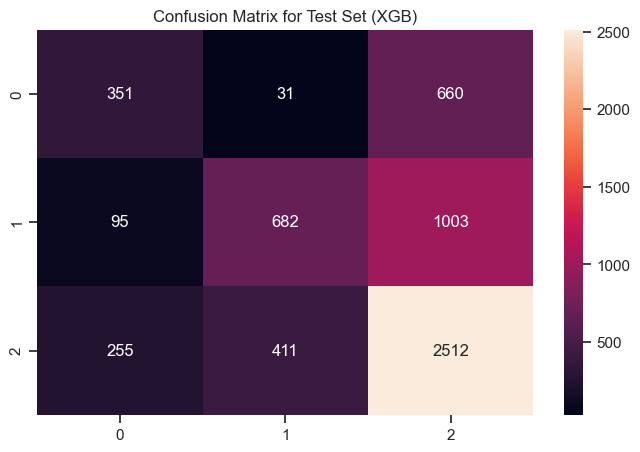

Training-set: XGBoost model accuracy score(XGB): 0.6216
Classification report(XGB) for Training Set:
               precision    recall  f1-score   support

           0       0.56      0.37      0.45      4330
           1       0.64      0.42      0.51      6930
           2       0.63      0.82      0.71     12740

    accuracy                           0.62     24000
   macro avg       0.61      0.54      0.55     24000
weighted avg       0.62      0.62      0.60     24000

Confusion matrix(XGB) for Training Set:
 [[ 1607   141  2582]
 [  417  2896  3617]
 [  839  1485 10416]]


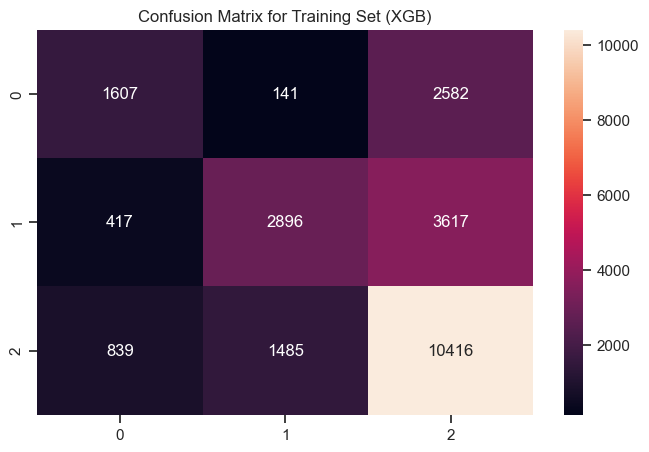

ROC and AUC values for each class (Test Set):
Class 0: ROC = 0.80, AUC = 0.80
Class 1: ROC = 0.75, AUC = 0.75
Class 2: ROC = 0.66, AUC = 0.66
Micro-average ROC and AUC (Test Set):
Micro-average ROC = 0.78, AUC = 0.78


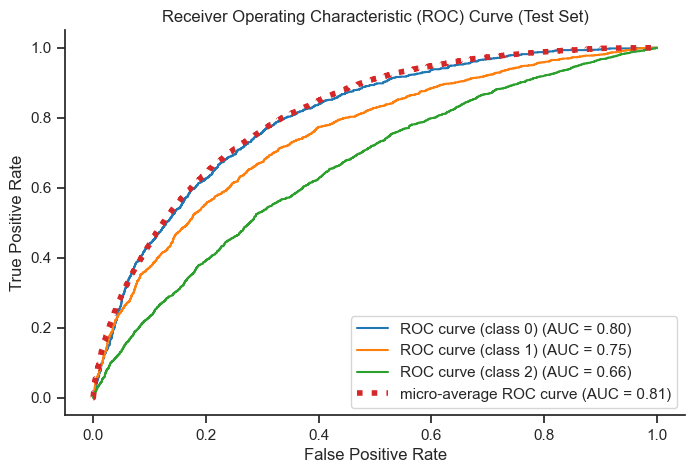

ROC and AUC values for each class (Training Set):
Class 0: ROC = 0.83, AUC = 0.83
Class 1: ROC = 0.78, AUC = 0.78
Class 2: ROC = 0.71, AUC = 0.71
Micro-average ROC and AUC (Training Set):
Micro-average ROC = 0.81, AUC = 0.81


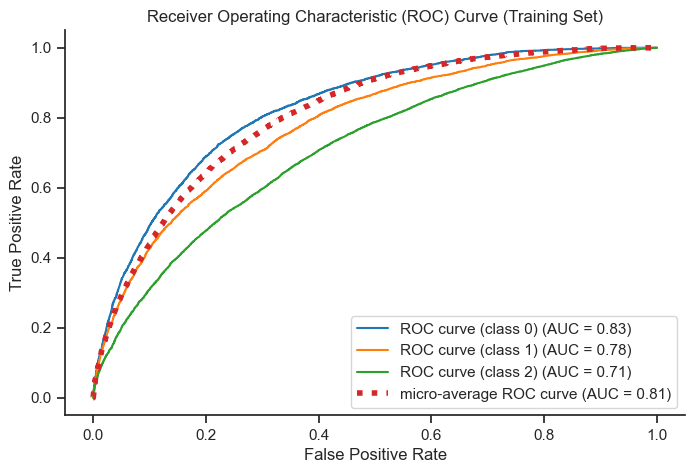

In [232]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the target variable and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# declare parameters
params = {
    'objective': 'multi:softmax',  # for multiclass classification
    'num_class': len(np.unique(y_train)),  # number of classes
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators': 100
}

# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train_encoded)

# Predict probabilities on the test set
y_pred_proba_test = xgb_clf.predict_proba(X_test)
y_pred_test = np.argmax(y_pred_proba_test, axis=1)

# Predict probabilities on the training set
y_pred_proba_train = xgb_clf.predict_proba(X_train)
y_pred_train = np.argmax(y_pred_proba_train, axis=1)

# Compute and print accuracy score for test set
acc_test_score_xgb = accuracy_score(y_test_encoded, y_pred_test)
print('Testing-set: XGBoost model accuracy score(XGB): {0:0.4f}'.format(acc_test_score_xgb))

# Print classification report for the test set
print('Classification report(XGB) for Test Set:\n', classification_report(y_test_encoded, y_pred_test))

# Calculate confusion matrix for the test set
cm_xgb_test = confusion_matrix(y_test_encoded, y_pred_test)
print('Confusion matrix(XGB) for Test Set:\n', cm_xgb_test)

# Visualize confusion matrix for the test set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_xgb_test, annot=True, fmt="d")
plt.title('Confusion Matrix for Test Set (XGB)')
plt.show()

# Compute and print accuracy score for training set
acc_train_score_xgb = accuracy_score(y_train_encoded, y_pred_train)
print('Training-set: XGBoost model accuracy score(XGB): {0:0.4f}'.format(acc_train_score_xgb))

# Print classification report for the training set
print('Classification report(XGB) for Training Set:\n', classification_report(y_train_encoded, y_pred_train))

# Calculate confusion matrix for the training set
cm_xgb_train = confusion_matrix(y_train_encoded, y_pred_train)
print('Confusion matrix(XGB) for Training Set:\n', cm_xgb_train)

# Visualize confusion matrix for the training set with seaborn library
plt.figure(figsize=(8, 5))
sns.heatmap(cm_xgb_train, annot=True, fmt="d")
plt.title('Confusion Matrix for Training Set (XGB)')
plt.show()

# Calculate ROC curve and AUC for each class for test set
fpr_xgb_test = dict()
tpr_xgb_test = dict()
roc_auc_xgb_test = dict()

for i in range(len(np.unique(y_test_encoded))):
    fpr_xgb_test[i], tpr_xgb_test[i], _ = roc_curve(y_test_encoded == i, y_pred_proba_test[:, i])
    roc_auc_xgb_test[i] = auc(fpr_xgb_test[i], tpr_xgb_test[i])

# Compute micro-average ROC curve and ROC area for test set
fpr_xgb_test["micro"], tpr_xgb_test["micro"], _ = roc_curve(label_binarize(y_test_encoded, classes=np.unique(y_test_encoded)).ravel(), y_pred_proba_test.ravel())
roc_auc_xgb_test["micro"] = auc(fpr_xgb_test["micro"], tpr_xgb_test["micro"])

# Print ROC and AUC values for each class for test set
print("ROC and AUC values for each class (Test Set):")
for i in range(len(np.unique(y_test_encoded))):
    print("Class {}: ROC = {:.2f}, AUC = {:.2f}".format(i, roc_auc_xgb_test[i], roc_auc_score(y_test_encoded == i, y_pred_proba_test[:, i])))

# Print micro-average ROC and AUC for test set
print("Micro-average ROC and AUC (Test Set):")
print("Micro-average ROC = {:.2f}, AUC = {:.2f}".format(roc_auc_xgb_test["micro"], roc_auc_score(label_binarize(y_test_encoded, classes=np.unique(y_test_encoded)).ravel(), y_pred_proba_test.ravel())))

# Plot ROC curve for each class for test set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_test_encoded))):
    plt.plot(fpr_xgb_test[i], tpr_xgb_test[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc_xgb_test[i]))
    
plt.plot(fpr_xgb_train["micro"], tpr_xgb_train["micro"], label='micro-average ROC curve (AUC = {:.2f})'.format(roc_auc_xgb_train["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend()
plt.show()

# Calculate ROC curve and AUC for each class for training set
fpr_xgb_train = dict()
tpr_xgb_train = dict()
roc_auc_xgb_train = dict()

for i in range(len(np.unique(y_train_encoded))):
    fpr_xgb_train[i], tpr_xgb_train[i], _ = roc_curve(y_train_encoded == i, y_pred_proba_train[:, i])
    roc_auc_xgb_train[i] = auc(fpr_xgb_train[i], tpr_xgb_train[i])

# Compute micro-average ROC curve and ROC area for training set
fpr_xgb_train["micro"], tpr_xgb_train["micro"], _ = roc_curve(label_binarize(y_train_encoded, classes=np.unique(y_train_encoded)).ravel(), y_pred_proba_train.ravel())
roc_auc_xgb_train["micro"] = auc(fpr_xgb_train["micro"], tpr_xgb_train["micro"])

# Print ROC and AUC values for each class for training set
print("ROC and AUC values for each class (Training Set):")
for i in range(len(np.unique(y_train_encoded))):
    print("Class {}: ROC = {:.2f}, AUC = {:.2f}".format(i, roc_auc_xgb_train[i], roc_auc_score(y_train_encoded == i, y_pred_proba_train[:, i])))

# Print micro-average ROC and AUC for training set
print("Micro-average ROC and AUC (Training Set):")
print("Micro-average ROC = {:.2f}, AUC = {:.2f}".format(roc_auc_xgb_train["micro"], roc_auc_score(label_binarize(y_train_encoded, classes=np.unique(y_train_encoded)).ravel(), y_pred_proba_train.ravel())))

# Plot ROC curve for each class for training set
plt.figure(figsize=(8, 5))
for i in range(len(np.unique(y_train_encoded))):
    plt.plot(fpr_xgb_train[i], tpr_xgb_train[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc_xgb_train[i]))

plt.plot(fpr_xgb_train["micro"], tpr_xgb_train["micro"], label='micro-average ROC curve (AUC = {:.2f})'.format(roc_auc_xgb_train["micro"]), linestyle=':', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Set)')
plt.legend()
plt.show()

9. Results and Conclusion

### Evaluate Data

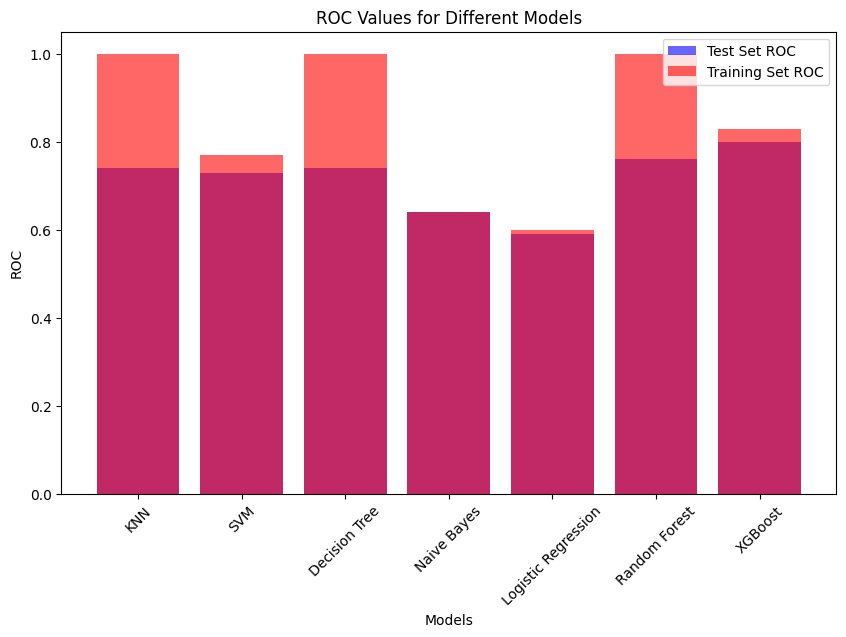

In [1]:
import matplotlib.pyplot as plt

# Models
models = ['KNN', 'SVM', 'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'XGBoost']

# Test Set ROC values
test_roc_values = [0.74, 0.73, 0.74, 0.64, 0.59, 0.76, 0.80]

# Training Set ROC values
train_roc_values = [1.00, 0.77, 1.00, 0.64, 0.60, 1.00, 0.83]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, test_roc_values, color='blue', alpha=0.6, label='Test Set ROC')
plt.bar(models, train_roc_values, color='red', alpha=0.6, label='Training Set ROC')
plt.title('ROC Values for Different Models')
plt.xlabel('Models')
plt.ylabel('ROC')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Based on the ROC and AUC values obtained for each model on both the test and training sets, we can draw the following summary:

K-Nearest Neighbors (KNN):
Performs well on the training set with perfect ROC/AUC values (1.00/1.00).
Shows good performance on the test set with a ROC/AUC of 0.74.
Support Vector Machine (SVM):

Moderately performs on both training and test sets with ROC/AUC values around 0.73-0.77.
Decision Tree:

Similar to KNN, it achieves perfect ROC/AUC values on the training set (1.00/1.00).
Also, like KNN, it exhibits a good performance on the test set with a ROC/AUC of 0.74.
Multinomial Naive Bayes:

Performs modestly on both training and test sets with ROC/AUC values around 0.60-0.64.
Logistic Regression:

Shows a slightly lower performance compared to other models with ROC/AUC values around 0.59-0.60.
Random Forest:

Performs very well on the training set with perfect ROC/AUC values (1.00/1.00).
Also, it demonstrates a good performance on the test set with a ROC/AUC of 0.76.
XGBoost:

Exhibits the best performance among all models with the highest ROC/AUC values on both training (0.83/0.83) and test (0.80/0.80) sets.
In summary, XGBoost outperforms other models, followed by Random Forest, while KNN, Decision Tree, and SVM also demonstrate good performances. Multinomial Naive Bayes and Logistic Regression show relatively lower performances compared to the other models.




REFERENCE: https://www.kaggle.com/code/kabure/predicting-credit-risk-model-pipeline/notebook
           https://blog.stackademic.com/machine-learning-practice-problem-1-credit-score-classification-part-1-ed7d9ed2bf88
           https://www.kaggle.com/datasets/parisrohan/credit-score-classification